## NAME  - `KUMAR ROHIT`
## BRANCH - `AIML`

# Methodology and Approaches

## 1. Framing of the problem statement
-----

The crux of the problem lies in forecasting the sourcing cost values for the month of June 2021, utilizing the dataset spanning from July 2020 to May 2021.


## 2. Dataset Information and understanding
----

The dataset comprises sourcing information for various product combinations, spanning from July 2020 to May 2021. Each row represents the sourcing of a single unit of a specific product combination, delineated by attributes denoted in columns A to F. Notably, multiple rows may feature identical product combinations, reflecting individual sourcing instances.



## 3. Exploratory Data Analysis (EDA)
------
The EDA included the following:
- Explored the dataset dimensions/shape, checked for null values, and examined the data types of the features of the dataset.
- Checked for the features’ data types, identifying errors like the minimum value of Sourcing Cost column being negative.
- Conducted Univariate analysis and Multivariate Analysis, including frequency counts, box plots for outlier detection, and hist plots for distribution of the Sourcing Cost column. The multivariate analysis was guided by the following considerations:
  1. What is the comparison of total sourcing costs for powder and liquid products across different product types (NTM1, NTM2, and NTM3)?
  2. How do the total sourcing costs fluctuate monthly, and which month has the highest sourcing activity or cost?
  3. How do the sourcing costs compare between different manufacturers (X1, X2, X3) for both liquid and powder product types?
  4. What are the sourcing costs associated with different distribution channels (Direct, E-commerce, Retail, Wholesale), and which channel incurs the highest cost?
  5. How do the sourcing costs associated with different product types (liquid, powder) vary across different sourcing channels?
  6. How do manufacturers X1, X2, and X3 utilize different sourcing channels, and what are the comparative sourcing costs for each manufacturer across these channels?
- Investigated negative values in 'Sourcing Cost' and considered the optimum strategies to either remove or keep them.
- Found the presence of outliers in the Sourcing Cost column.

## 4. Pre-processing:
-----
### Outlier Detection and Handling:
For Outlier detection, the IQR (InterQuartile Range) method was used, with two approaches:
  - Removal/Trimming of the outliers from the data.
  - Clipping outliers to lower and upper bound.
  - This Resulted in four sets of data for further analysis. And for both of these two approaches, I handled the negative sourcing cost   values as follows:

#### Handling Negative Sourcing Cost Values:
- For handling the negative values, two approaches were considered: removal of the negative values or taking the absolute values of them.
- Since the number of negative values was relatively small compared to the total dataset size, removing them also didn't have much of an   effect on the performance of the models.

#### So after pre-processing, I had four sets of data:
1. Dataset with outliers removed and negative values removed as well.
2. Dataset with outliers removed but with the absolute values of the negative sourcing values.
3. Dataset with outliers clipped to the upper and lower bound, and the negative values removed.
4. Dataset with outliers clipped to the upper and lower bound, but with the absolute values of the negative sourcing values.
----
## 5. Analysis of association between different features:
- To ensure robustness in the regression model, I examined the relationships between independent variables, and between independent variables and the dependent variable 'Sourcing Cost':
  - The Kruskal-Wallis test was used to evaluate whether there are statistically significant differences in 'Sourcing Cost' across the categories of each categorical variable, helping to understand how different groups affect the dependent variable.
  - Cramer's V was utilized to measure the strength of association among categorical variables, identifying strong associations that might affect model interpretation.
  - I removed the 'Area Code' column after identifying its strong association with other categorical variables, which could lead to issues similar to multicollinearity when categorical variables are converted to dummy variables for regression analysis.
----
## 6. Modeling and Evaluation
-----
### Data Preparation for modeling:
After removing the outliers and the negative Sourcing cost values, I dropped the Area Code and the Month of Sourcing Column. The reason for dropping area code was as previously mentioned that it was strongly associated with the other categorical variables which might have hampered  the model’s performance. The reason behind removing the Month of Sourcing Column was that in the training data we had 11 months but in test data we just have 1 month so if we consider one hot encoding it the number of features in the train set would be greater than in the test set which would give error when predicting on the test set. Also if Label Encoder is used there would be 11 different values in the train set but a single value in the test set which could again cause discrepancy and that will hamper the performance of the model.For encoding the categorical varibales I used One Hot Encoding as there was no ordinal relationship among the categories.

Now lets see the different approaches that were adopted -

### 1st approach:
-----
The first approach involved implementing regression models such as Linear Regression (LR) and ensemble models like Random Forest Regressor (RFR) and XGBoost Regressor (XGB) . These models were trained on the training data with the aim of predicting the Sourcing Costs. To ensure better generalizability of the models and to prevent overfitting, K-Fold cross-validation with 5 splits is applied. Cross-validation involves dividing the dataset into k subsets, training the model on k-1 subsets, and evaluating it on the remaining subset. This process is repeated k times, with each subset used as the test set exactly once. The reason for choosing models like Random Forest and XGBoost is that they have the ability to capture non-linear relationships and complex patterns in the data , which may not be captured effectively by simple regression models. These models combine multiple base models to improve predictive performance and robustness.

#### Model Performance:
- Linear Regression (LR):

    The Linear Regression model exhibited poor performance both on the training and test datasets, with an R2 score of 0.37 on the training data and only 0.20 on the test data. Additionally, it had a relatively high RMSE of 42.78 on the training data and 46.3 on the test data. This suggests that the LR model struggled to capture the underlying relationship between the features and the target variable, and this is evident from the plot of the original Sourcing cost value and the predicted ones, where it can be seen that the model is not able to capture the underlying pattern and is largely underfitting.

- Random Forest Regressor (RFR) and XGBoost Regressor (XGB):

    In contrast, both Random Forest Regressor and XGBoost Regressor models performed significantly better than Linear Regression. They demonstrated higher R2 scores on both the training and test datasets as compared to the Linear Regression model, indicating a better fitting to the data. RFR achieved an R2 score of 0.56 on the training data and 0.375 on the test data, with corresponding RMSE values of 37.02 and 41.04. Similarly, XGB achieved R2 scores of 0.55 on the training data and 0.36 on the test data, with RMSE values of 37.03 and 41.05, respectively. Although they performed better than the LR model still the results on the test data are not satisfactory, and the plot also conveys the same.
  
<h4>Results Table:</h4>

<h5>Train Data:</h5>

<table>
  <tr>
    <th>Model</th>
    <th>R2 Score</th>
    <th>RMSE</th>
  </tr>
  <tr>
    <td>LR</td>
    <td>0.37</td>
    <td>42.78</td>
  </tr>
  <tr>
    <td>RFR</td>
    <td>0.56</td>
    <td>37.02</td>
  </tr>
  <tr>
    <td>XGB</td>
    <td>0.55</td>
    <td>37.03</td>
  </tr>
</table>

<h5>Test Data:</h5>

<table>
  <tr>
    <th>Model</th>
    <th>R2 Score</th>
    <th>RMSE</th>
  </tr>
  <tr>
    <td>LR</td>
    <td>0.20</td>
    <td>46.3</td>
  </tr>
  <tr>
    <td>RFR</td>
    <td>0.375</td>
    <td>41.04</td>
  </tr>
  <tr>
    <td>XGB</td>
    <td>0.36</td>
    <td>41.05</td>
  </tr>
</table>


  It can be clearly seen that the model is overfitting its performance drops on the test data drastically.

  Both Random Forest and XGB models were applied on all the four sets of data that were mentioned above in the pre-processing section and the results displayed are the average of the metrics that I obtained from the four datasets, but there was no significant change in the metrics on any particular set of data, so for further approaches, I considered the dataset in which the outliers and the negative Sourcing Cost values had been removed as outliers and negative Sourcing Values can distort the underlying distribution of the data and introduce noise into the model training process.

  In this approach, I also performed Hyperparameter tuning of Random Forest Algorithm (max_depth, min_samples_leaf, min_samples_split, n_estimators) but even after that the results were not very significant. The best `r2_score` and `rmse` was 0.56 and 35.86 respectively which are almost the same as before doing it.

  Overall, the ensemble models, particularly Random Forest and XGBoost, outperformed the Linear Regression model in predicting the sourcing costs. However, even the best-performing models (RF and XGB) showed limitations in accurately predicting the sourcing costs, as evidenced by the low R2 scores and relatively high RMSE values on the test dataset indicating that another approach to the problem is required.
### 2nd approach :
-------
 In the second approach, I grouped the duplicate rows based on all the categorical columns. For each group, I aggregated the sourcing costs, summing them to obtain the total sourcing cost for that group. Additionally, I counted the quantity of each product within the group. This was achieved by counting the number of rows corresponding to each group and storing the counts in a new column named "Quantity." Finally, I calculated and created another feature as the average sourcing cost per unit by dividing the total sourcing cost by the quantity for each group which was then used in training of the model, Otherwise directly using the summed up sourcing cost column would have largely deviated from the original values.

  In this approach both Random Forest and Xg_Boost regressor were used. The results are as follows -

  <h4>Results Table:</h4>

<h5>Train Data:</h5>

<table>
  <tr>
    <th>Model</th>
    <th>RMSE</th>
    <th>R2 Score</th>
  </tr>
  <tr>
    <td>RF</td>
    <td>9.878</td>
    <td>0.952</td>
  </tr>
  <tr>
    <td>XG</td>
    <td>9.886</td>
    <td>0.952</td>
  </tr>
</table>

<h5>Test Data:</h5>

<table>
  <tr>
    <th>Model</th>
    <th>RMSE</th>
    <th>R2 Score</th>
  </tr>
  <tr>
    <td>RF</td>
    <td>40.435</td>
    <td>0.397</td>
  </tr>
  <tr>
    <td>XG</td>
    <td>40.347</td>
    <td>0.400</td>
  </tr>
</table>

The results again show that the models are overfitting. It performs nicely on train data but but very poor performance on the test data. The plots for both the models convey the same - not able to capture the pattern properly.

### 3rd approach :
------
In this approach I again didn’t consider the Area code but as this approach includes a time series approach so the Month of Sourcing column was effectively used in this case.

So this approach included a combination of Time Series analytics and regression. As we had a datetime column in the dataset, I thought to make use of it and see if that would improve the model’s performance. So first of all as we do in a time series problem I made the index of the dataframe to the `Month of Sourcing` column, sorted the data frame according to the index and then created additional features for modeling. They include -
  - Lagged features for the 'Sourcing Cost' considering the past three months - To capture the historical values of sourcing costs.These lagged features will allow the model to consider the effect of past sourcing costs on the current value, which can improve prediction accuracy in time series analysis.

  - Rolling mean and standard deviation for the past 3 months - To capture the trend and variability in sourcing costs over a rolling window of 3 months, providing additional information for the model to learn from.

  - Additional rolling quantiles - For understanding  the spread and central tendency of the data.

  - Month, Year, and Quarter from the index  -  For seasonal analysis and trend identification at different time granularities, aiding in understanding the temporal patterns and cyclicality present in the data.
    
  After this data preparation and feature engineering, Random Forest Algorithm and XGBoost Algorithm were applied for predicting the sourcing cost value. This approach gave the best result amongst all the approaches and models training. For Random Forest, the `R2 score` was `0.998` and `RMSE `was `1.78` on the training data, while on the test data, the `R2 score` was `0.98` and RMSE was `5.21`. The plot of the original sourcing values and the predicted values also shows that the Random Forest model was able to capture the relationship of the data, hence performing well. Similarly, for XGBoost, the `R2 score` was `0.993` and `RMSE` was `4.19` on the training data, while on the test data, the R2 score was `0.994` and `RMSE` was `3.89`. The plot of the original Sourcing Cost values and the predicted values also shows that the XGBoost model more prominently captured the patterns in the data. Another interesting observation was the time both algorithms took - XgBoost was way faster than Random Forest while training.

# Final Approach: Time Series Analytics and Regression

### Feature Engineering:
----
- Prior to feature engineering, all outliers and negative Sourcing Cost values were eliminated from the dataset. Additionally, the 'Area Code' column, which exhibited strong correlations with other features, was dropped to streamline the data.

- The dataset was reformatted into a time series structure by indexing it with the 'Month of Sourcing' column. Subsequently, the data was sorted according to this index, facilitating chronological analysis.

- Lagged features for 'Sourcing Cost' were generated to capture historical trends. These lagged features enable the model to assimilate past sourcing cost values, enhancing its understanding of temporal dynamics.

- Rolling mean and standard deviation calculations over a 3-month window were performed to identify short-term trends and variability in sourcing costs. These rolling statistics offer insights into the distributional characteristics of the data and aid in capturing fluctuations over time.

- Further temporal features, such as year and month, were extracted from the index. By incorporating these features, the model gains the ability to detect seasonality and cyclical patterns inherent in the data, thereby enriching its predictive capabilities.

### Model Selection and Training:
----
Both Random Forest Regressor and XGBoost Regressor models were considered for this approach. Random Forest Regressor was initially selected due to its ability to handle non-linear relationships, high-dimensional datasets, and interactions between features. However, upon applying XGBoost Regressor, it was found that XGBoost performed even better and its way too fast than Random Forest in training due to its parallel processing ability.

### Model Evaluation and Performance:
----
- For evaluation, I used the r2_score metric and the rmse metric as in the problem statement we wanted to reduce the difference between the predicted and the original Sourcing Cost and rmse was more interpretable.
- I achieved a high R2 score and low RMSE on both training and test datasets, which was an indicative strong fit and generalization.
- For Random Forest - `R2_score` of `0.998` and  `RMSE` of `1.78` on the training data and `R2_score` of `0.98` and `RMSE` of `5.21` on test data. The plot of the original Sourcing Cost values and the predicted also shows that this time the model was able to capture the relationship of the data, hence performing well.
- For XgBoost - `R2_score` of `0.993` and  `RMSE` of `4.19` on the training data and `R2_score` of `0.994` and `RMSE` of `3.89` on test data. The plot of the original Sourcing Cost values and the predicted values also shows that xgb model is more prominently capturing the patterns in the data.

Result Table -

| Model               | Train MSE | Train R^2 Score | Train RMSE | Test R^2 Score | Test RMSE |
|---------------------|-----------|-----------------|------------|----------------|-----------|
| Random Forest (RF)  | 3.178     | 0.989           | 1.783      | 0.990          | 5.211     |
| XGBoost (XGB)       | 17.585    | 0.994           | 4.193      | 0.994          | 3.891     |



### Interpretation and Insights:
-----

Overall, the adoption of a Time Series-based approach combined with Random Forest and XgBoost Regression models proved highly effective in predicting sourcing costs and understanding the true relationship of the data as in all other approaches the models performed well on training data but very poorly in the test data, but the model obtained from this approach was able to perform well both on train as well as test data.

### Why Time Series Analytics and Regression??
-----
The following points highlight the reason of selecting this approach : -
1. Each row represented the sourcing of a product over different months, inherently making the data sequential. This characteristic made it ideal for time series analysis.
   
2. The temporal order of data is instrumental in uncovering patterns and trends that influence sourcing costs. Time series analysis helped the model in identifying these trends and making accurate forecasts based on historical data.
   
3. The utilisation of lagged features allowed the model to incorporate historical sourcing costs, which are crucial for predicting future values. This approach helped the model to learn from past trends and improve its forecasting accuracy.
   
4.  By extracting temporal features like month, year, and quarter, the model was able to identify and utilize seasonal patterns and cyclic trends.

These additional features helped the models to capture the pattern in the data and make accurate predicitons and thus getting very good results.

### Why did it perform so well??
-----
By leveraging the datetime column and incorporating lagged features, rolling statistics, and additional temporal features such as month, year, and quarter, the model gained a comprehensive understanding of the data's temporal dynamics. For instance, the lagged features allowed the model to capture the influence of past sourcing costs on current values, enabling it to discern patterns and trends over time. Similarly, the inclusion of rolling statistics, such as rolling mean and standard deviation, provided insights into short-term variations and trends in sourcing costs. Additionally, extracting temporal features like month, year, and quarter facilitated the detection of seasonal patterns and cyclicality within the data.

By incorporating these time series features, the model was equipped with a rich set of information to make accurate predictions. Overall, the effective utilization of time series features empowered the model to understand and adapt to the underlying patterns and dynamics of the data, resulting in accurate predictions of sourcing costs on the test data and therefore I selected this as my final approach.


# Code -

In [14]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import kruskal
from xgboost import XGBRegressor
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to format the ticks of the plots to show the price in Millions
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}M'

In [15]:
# loading the data into train_data dataframe
train_data = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Training_data.xlsx")

In [16]:
# loading the testg data
test_data = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Test_data.xlsx")
test_data.shape

(96, 8)

In [17]:
# Checking the number of months in the Month of Sourcing Column in both test and train
print(test_data['Month of Sourcing'].value_counts()) # Only containing one month data - June
print(train_data['Month of Sourcing'].value_counts())  # Containing 11 months data excluding June

Month of Sourcing
2021-06-21    96
Name: count, dtype: int64
Month of Sourcing
2020-11-01    60446
2021-03-01    56643
2021-05-01    53172
2020-12-01    52752
2021-04-01    52438
2021-01-01    50844
2021-02-01    50562
2020-10-01    46215
2020-09-01    43995
2020-07-01    42469
2020-08-01    40640
Name: count, dtype: int64


In [18]:
# checking the first few rows
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


In [19]:
# Checking the shape of the dataset
train_data.shape

(550176, 8)

In [20]:
# Names of the column present in the dataset
train_data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [21]:
# Checking for the null values
train_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [22]:
# For checking the data types of the features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [23]:
train_data.describe()
# Here we can see that minimum value in sourcing cost is negative which generally is not possible.
# We need to check how many negative sourcing cost values are there

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.816793
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.147000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390097


In [24]:
# Checking how many rows have negative sourcing values
train_data[train_data['Sourcing Cost'] < 0]
print(f"Number of zero values {len(train_data[train_data['Sourcing Cost'] < 0])}")

Number of zero values 2231


In [25]:
# Checking for the dupliate rows (As this was mentioned in the problem statement that there could be duplicate rows)
train_data.duplicated().sum()

541165

# Univariate Analysis

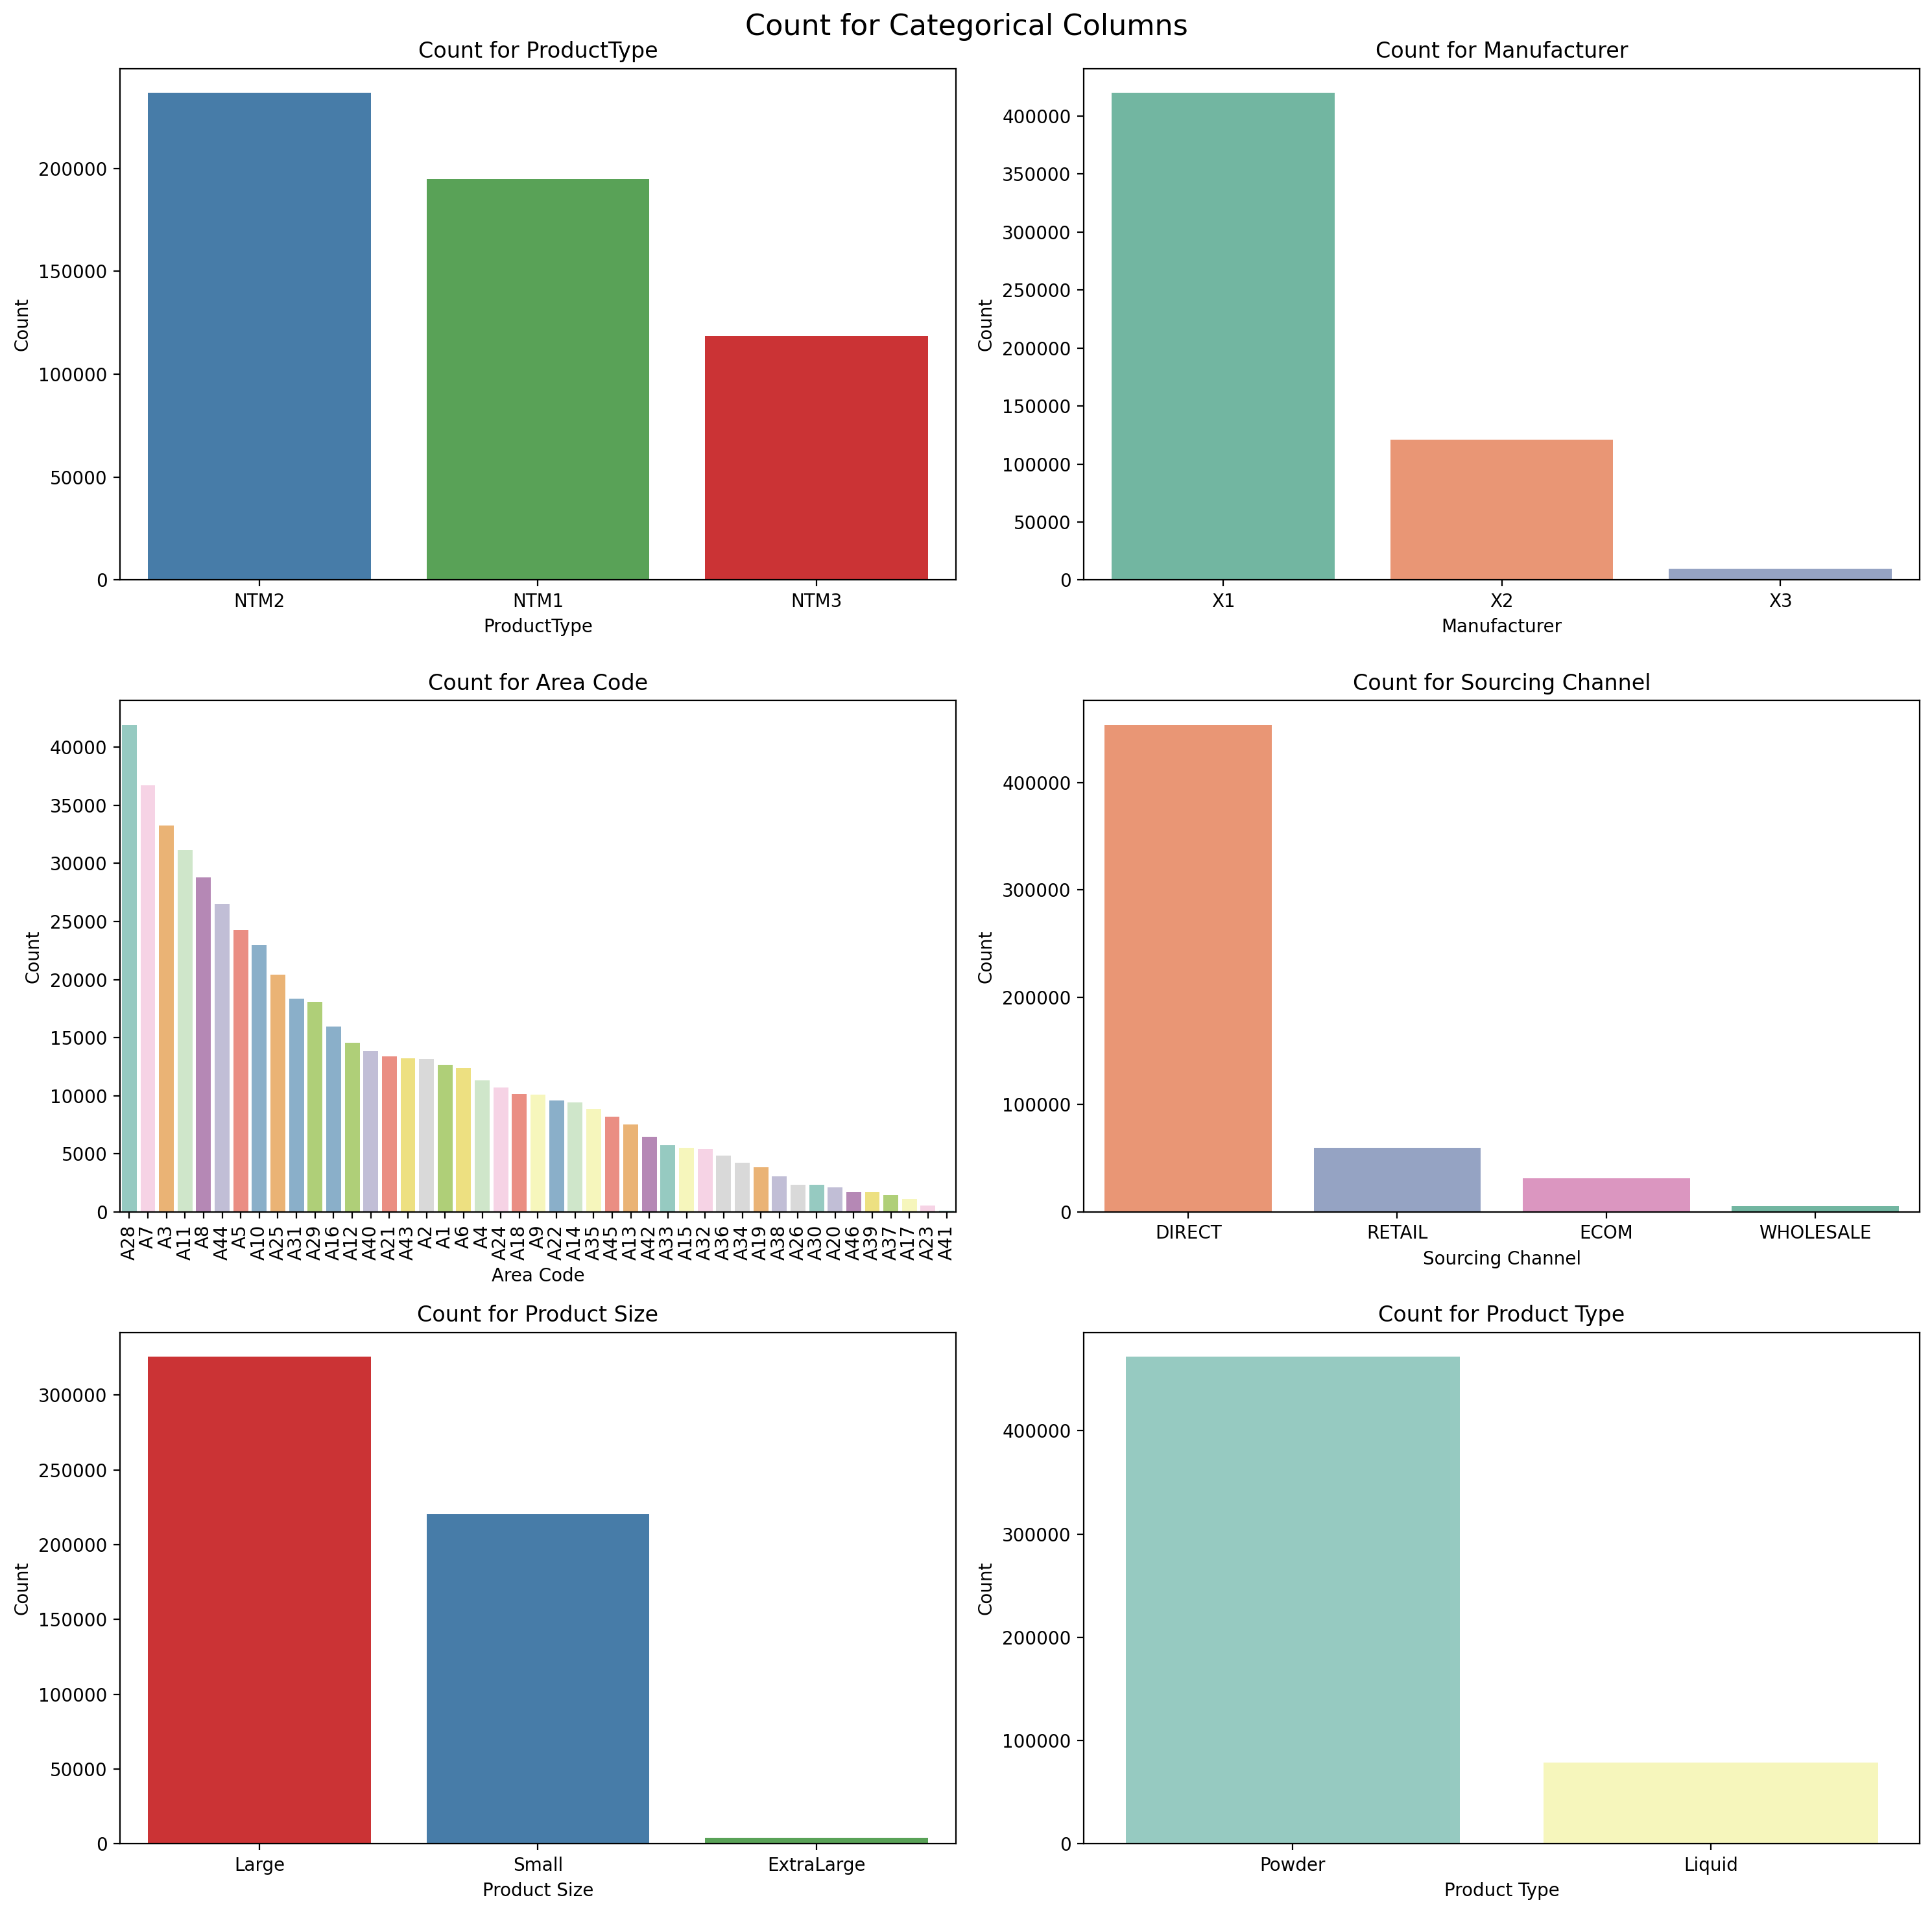

In [26]:
# Color palettes for each category
color_palettes = {
    'ProductType': 'Set1',
    'Manufacturer': 'Set2',
    'Area Code': 'Set3',
    'Sourcing Channel': 'Set2',
    'Product Size': 'Set1',
    'Product Type': 'Set3'
}
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type']

# Sorting the unique values for every column based on count
sorted_values = {col: train_data[col].value_counts().index.tolist() for col in categorical_columns}

#subplots for categorical columns
fig, axes = plt.subplots(3, 2, figsize=(15, 15), dpi=200)
fig.suptitle("Count for Categorical Columns", fontsize=16)

for i, col in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2

    sns.countplot(x=col, data=train_data, order=sorted_values[col], palette=color_palettes[col], ax=axes[row_index, col_index], hue=col)

    # Rotate x-axis labels only for 'Area Code' becuase it was getting cluttered on the x-axis
    if col == 'Area Code':
        axes[row_index, col_index].tick_params(axis='x', labelrotation=90)

    axes[row_index, col_index].set_title(f"Count for {col}")
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel("Count")

plt.tight_layout()
plt.show()

***Interpretation*** -

- ProductType - NTM2 is the most prevalent product type in the dataset, followed by NTM1 and NTM3.
- Manufacturer - X1 has the highest production volume, significantly more than X2 and X3.
- Area Code - Area Code A28 has the highest frequency of sourcing activities.
- Sourcing Channel - The Direct channel is used most frequently for sourcing, dominating over Retail, E-commerce, and Wholesale.
- Product Size - Large-sized products are the most commonly sourced, with Small and ExtraLarge sizes less frequent.
- Product Type - Powdered products are sourced more frequently than liquid products.

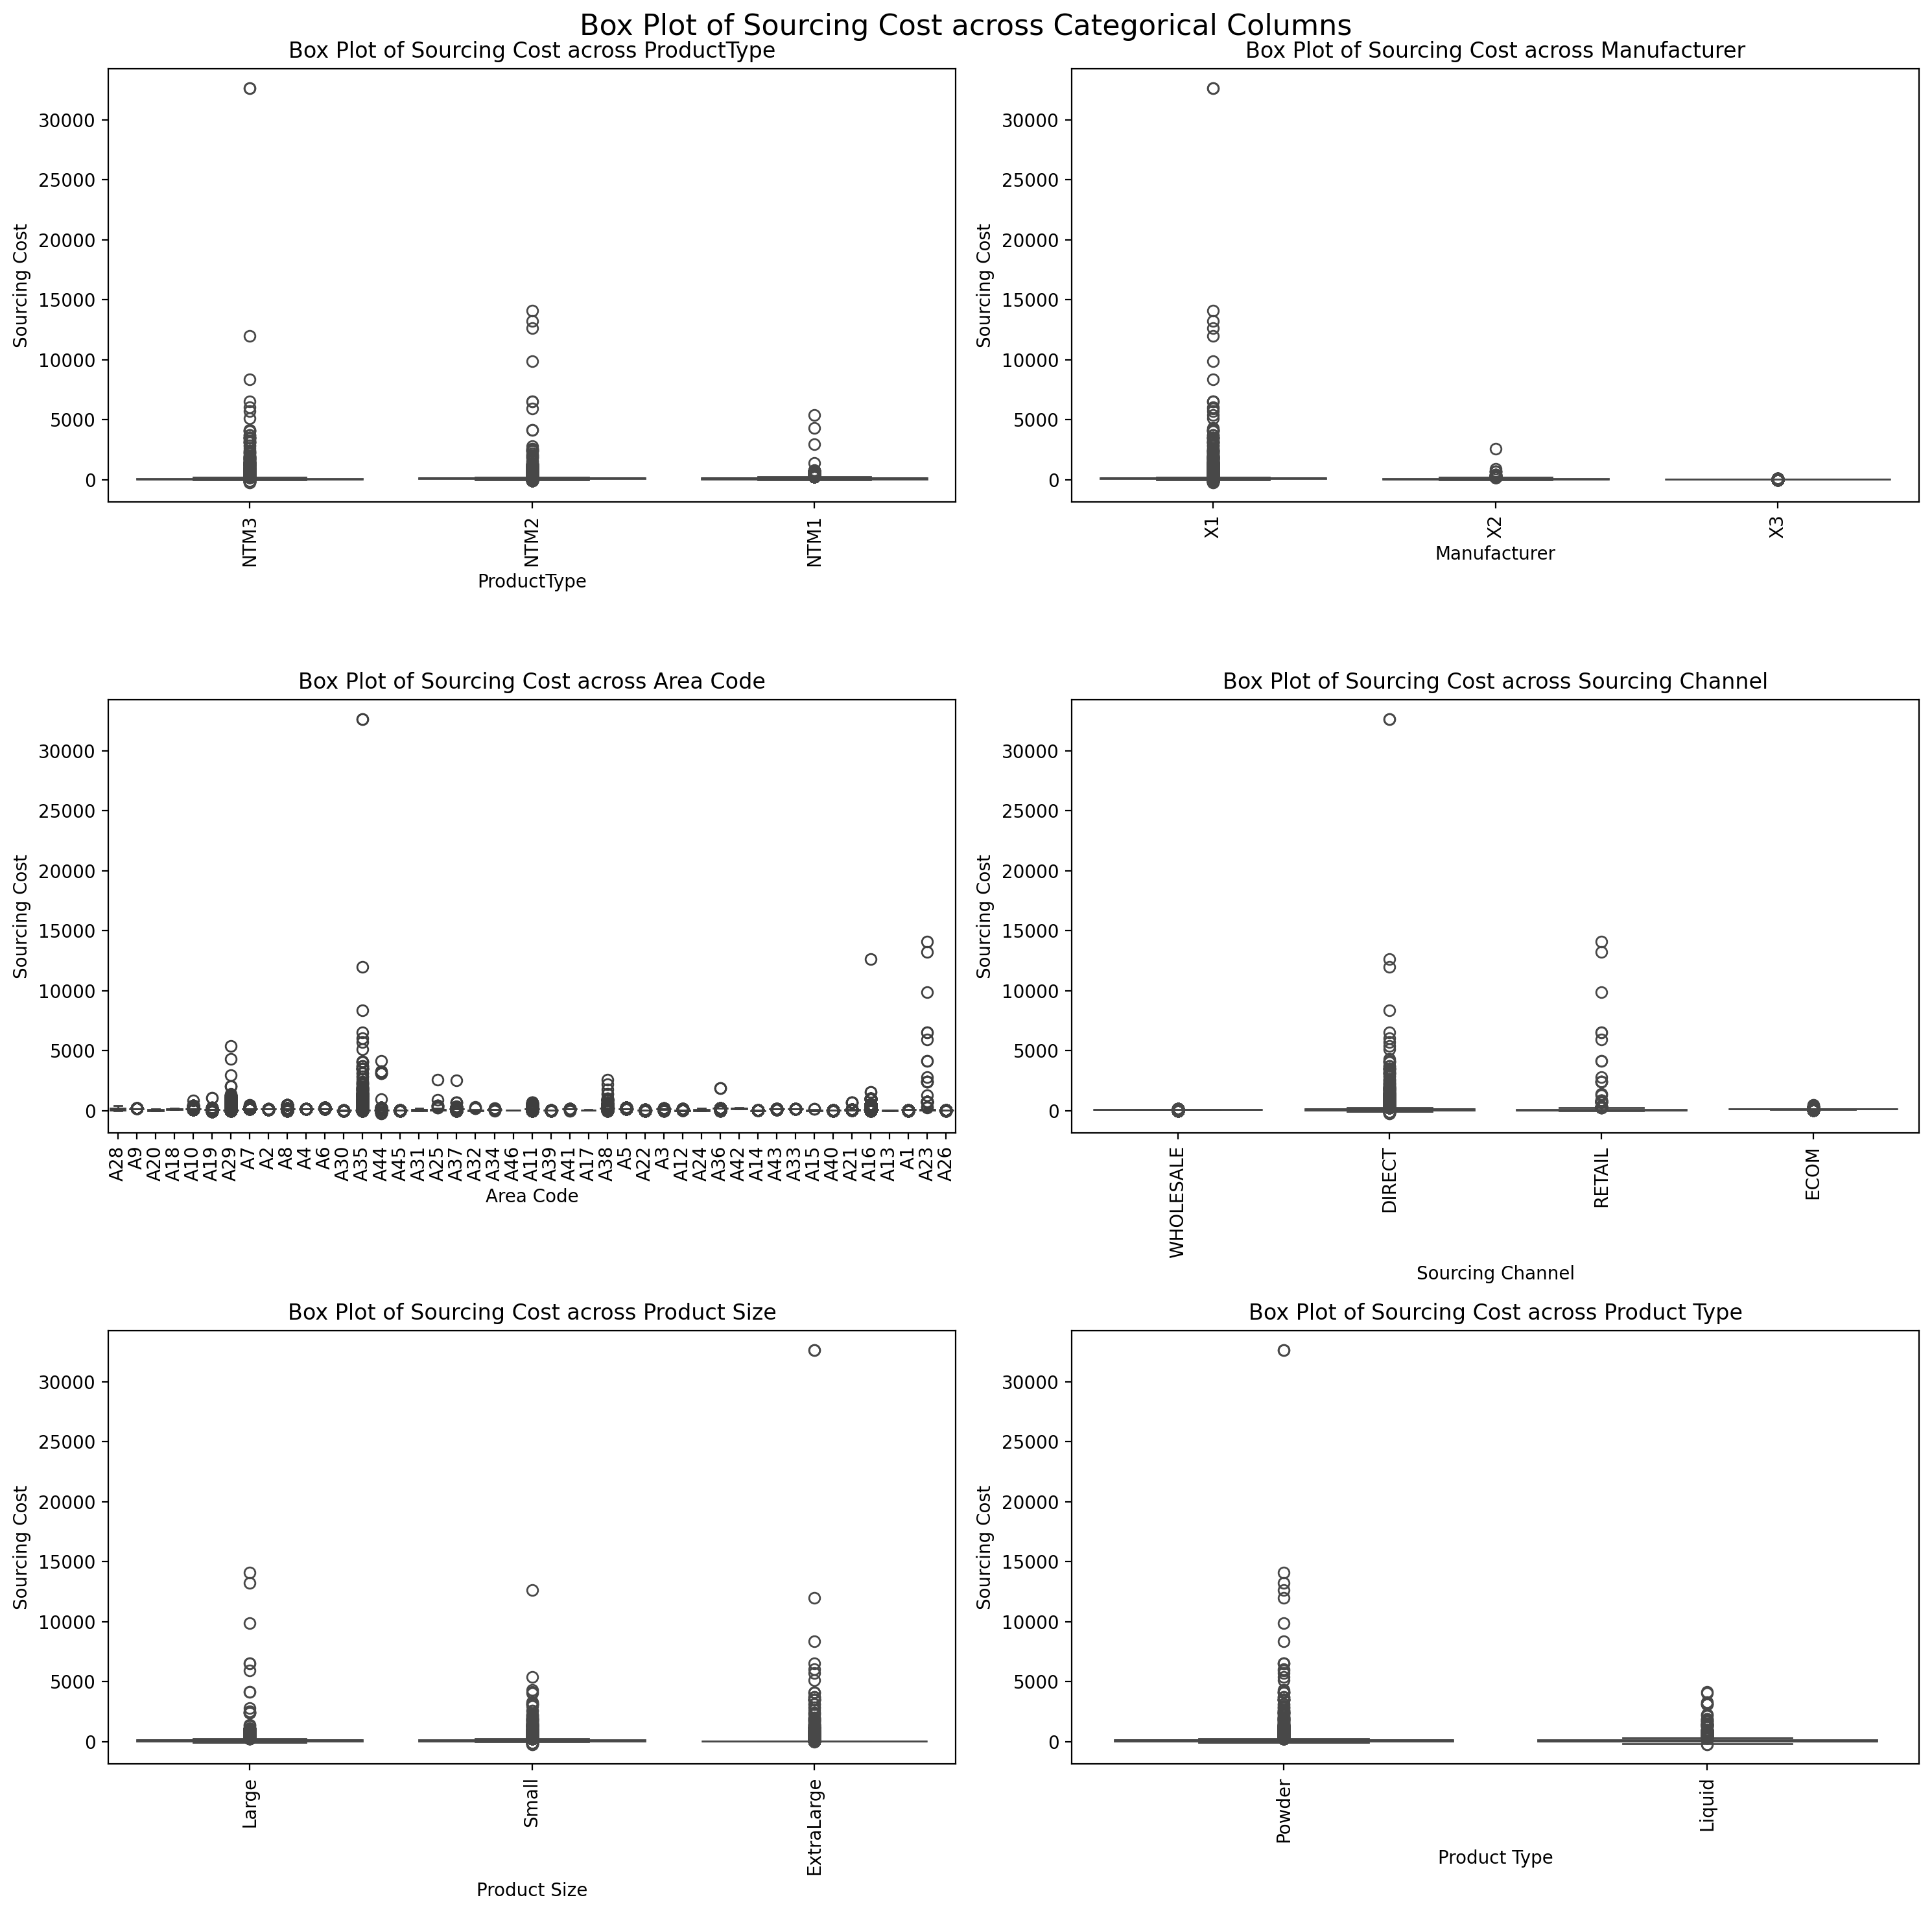

In [27]:
#subplots for box plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15),dpi=200)
fig.suptitle("Box Plot of Sourcing Cost across Categorical Columns", fontsize=16)

for i, column in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2

    sns.boxplot(x=column, y='Sourcing Cost', data=train_data, ax=axes[row_index, col_index],palette='Set1',hue=column)
    axes[row_index, col_index].tick_params(axis='x', labelrotation=90)

    axes[row_index, col_index].set_title(f"Box Plot of Sourcing Cost across {column}")
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel("Sourcing Cost")

plt.tight_layout()
plt.show()


***Interpretaion*** -
The box plots across various categorical columns such as Product Type, Manufacturer, Area Code, Sourcing Channel, and Product Size reveal the presence of numerous outliers in the data. These outliers indicate significant deviations from typical sourcing costs and could potentially skew the analysis, suggesting a need for appropriate outlier handling or robust statistical methods to ensure effective results from the model.

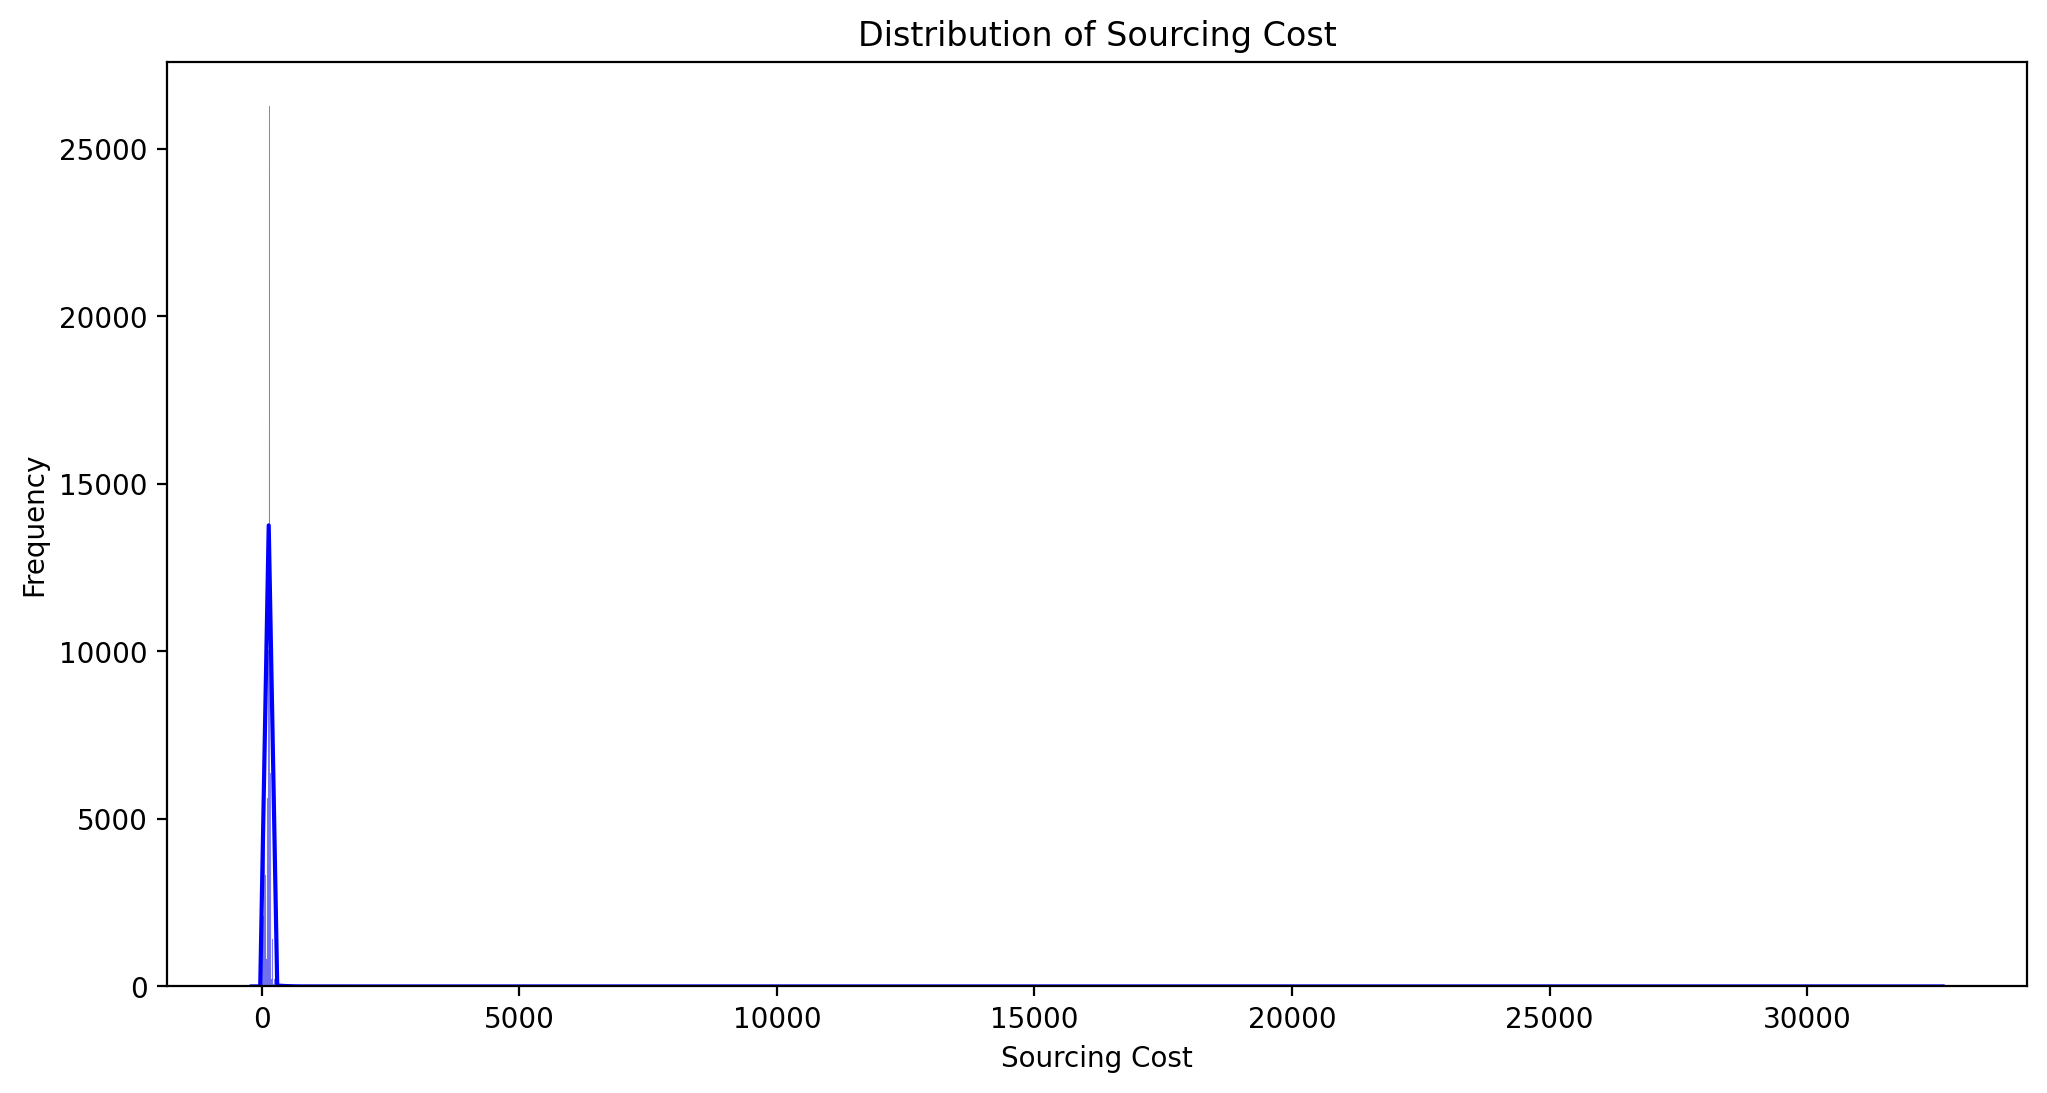

In [28]:
plt.figure(figsize=(12, 6),dpi=200)
sns.histplot(train_data['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

Interpretation - The plot indicates that the sourcing cost data is highly skewed, with most values clustered near the lower end and a few high outliers. This concentration suggests that typical sourcing costs are low, with exceptional cases driving costs significantly higher

# Multivariate Analysis

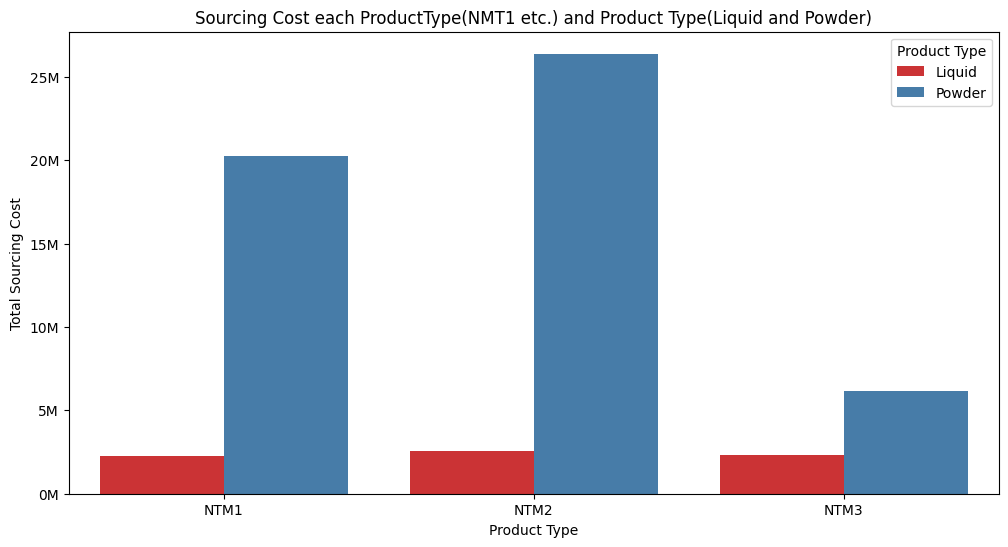

In [29]:
product_sales = train_data.groupby(['ProductType', 'Product Type'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=product_sales, x='ProductType', y='Sourcing Cost', hue='Product Type', palette='Set1')

# Setting custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel('Product Type')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Cost each ProductType(NMT1 etc.) and Product Type(Liquid and Powder)')
plt.legend(title='Product Type')
plt.show()

***Interpretation*** -

In all product types (NTM1, NMT2, NMT3), powder is more frequently sourced than liquid, as indicated by the higher total sourcing costs for powder in each category


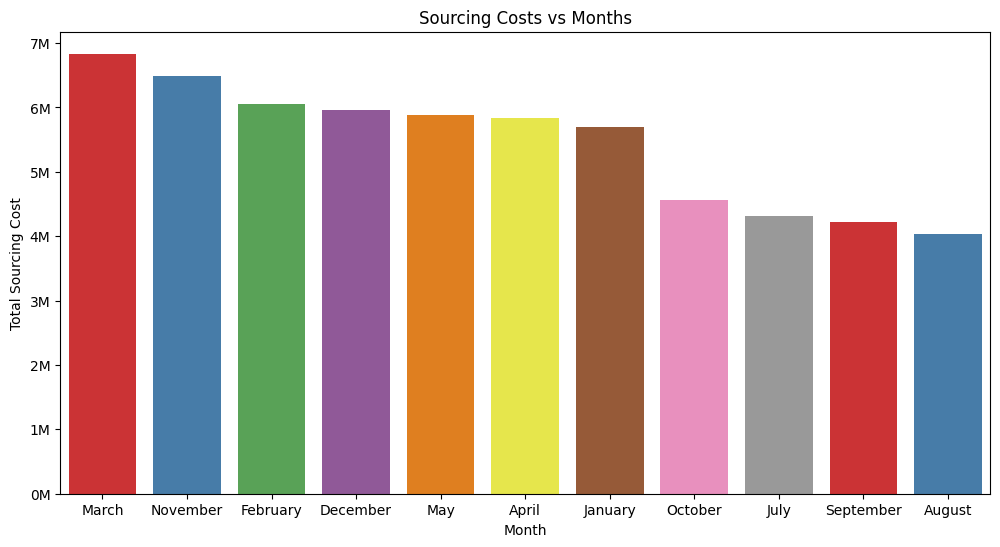

In [30]:
# Sales each month
monthly_sales = train_data.groupby(train_data['Month of Sourcing'].dt.month)['Sourcing Cost'].sum().reset_index()
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month of Sourcing'], format='%m').dt.month_name()

monthly_sales = monthly_sales.sort_values(by='Sourcing Cost', ascending=False)

plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=monthly_sales, x='Month', y='Sourcing Cost', order=monthly_sales['Month'], palette='Set1', hue='Month')
plt.xlabel('Month')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Costs vs Months')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


***Interpretation*** -

Among the 11 months displayed, sourcing costs were highest in March, indicating a peak in sourcing activities or costs during this month.


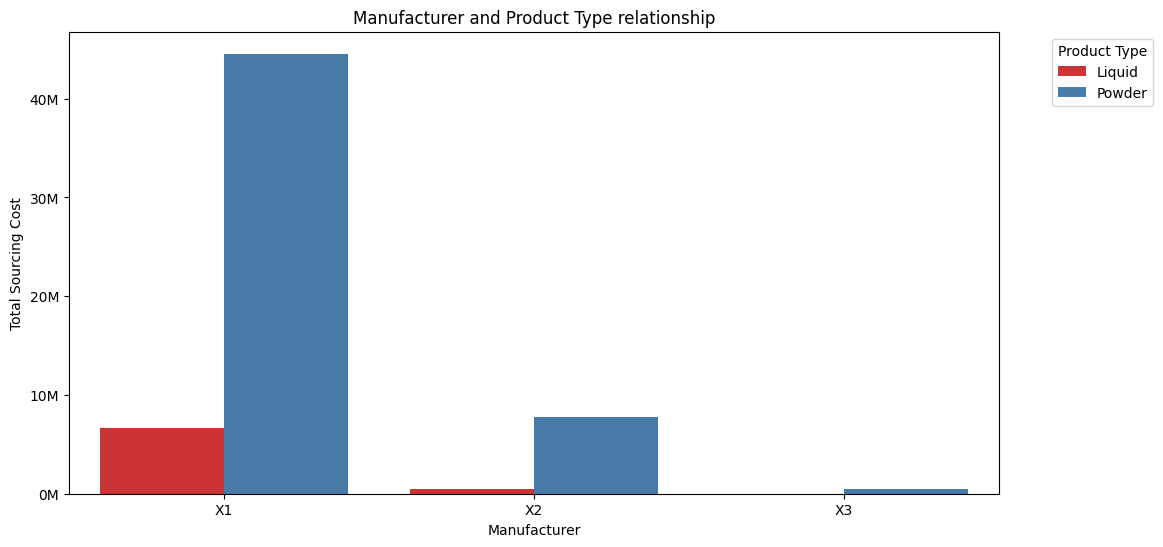

In [31]:
# Manufacturer and Product Type relationship
manufacturer_product_sales = train_data.groupby(['Manufacturer', 'Product Type'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=manufacturer_product_sales, x='Manufacturer', y='Sourcing Cost', hue='Product Type', palette='Set1')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sourcing Cost')
plt.title('Manufacturer and Product Type relationship')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


***Interpretation*** -

From the plot, it is evident that manufacturer X1 has the highest sourcing costs for both liquid and powder products, significantly surpassing manufacturers X2 and X3. Manufacturer X2 mainly sources powder products, whereas X3 focuses on liquid products.

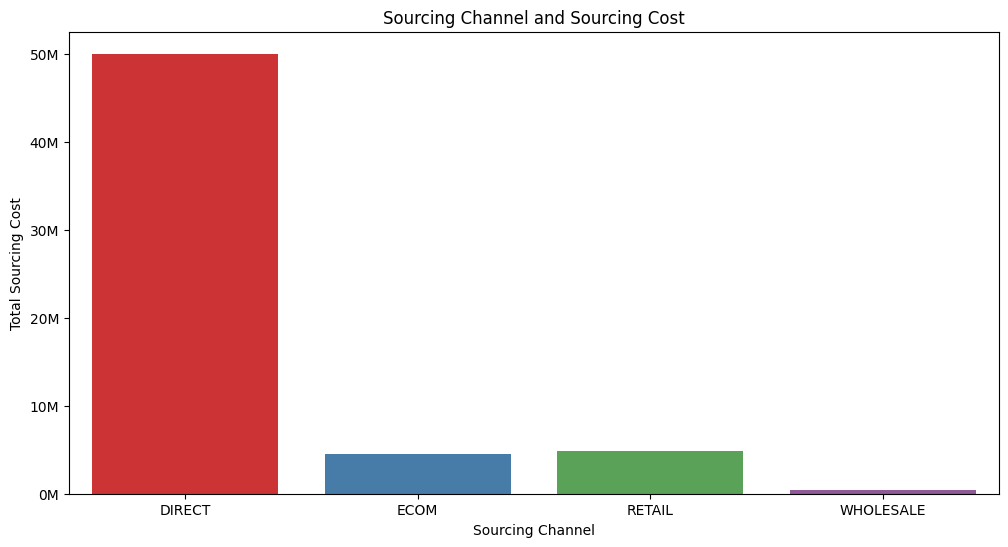

In [32]:
# Sourcing Channel and Sourcing Cost
sourcing_channel_sales = train_data.groupby('Sourcing Channel')['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=sourcing_channel_sales, x='Sourcing Channel', y='Sourcing Cost', palette='Set1', hue='Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Channel and Sourcing Cost')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


***Interpretation*** -
From the plot, it can be seen that the Direct sourcing channel incurs the highest sourcing costs, significantly more than E-commerce, Retail, and Wholesale channels, in descending order of cost.

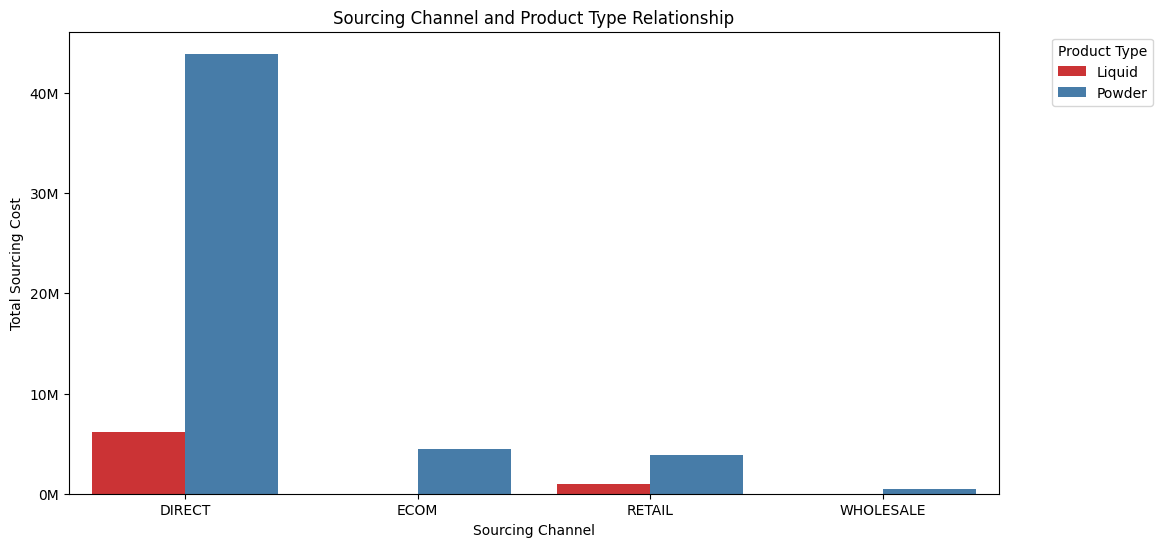

In [33]:
# Sourcing Channel and Product Type Relationship
sourcing_channel_product_type = train_data.groupby(['Sourcing Channel', 'Product Type'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=sourcing_channel_product_type, x='Sourcing Channel', y='Sourcing Cost', hue='Product Type', palette='Set1')
plt.xlabel('Sourcing Channel')
plt.ylabel('Total Sourcing Cost')
plt.title('Sourcing Channel and Product Type Relationship')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

***Interpretation*** -

The plot illustrates that the Direct sourcing channel significantly dominates in sourcing costs for both liquid and powder products. E-commerce and Wholesale channels exclusively source powder products, while Retail sources both but with a minimal amount compared to Direct.

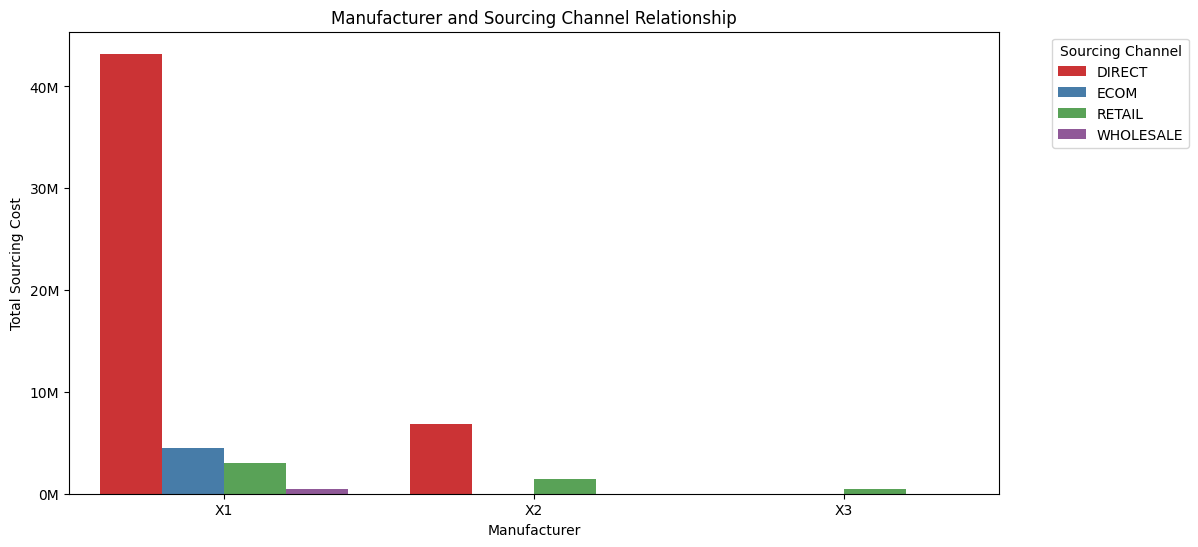

In [34]:
# Manufacturer and Sourcing Channel Relationship
manufacturer_sourcing_channel = train_data.groupby(['Manufacturer', 'Sourcing Channel'])['Sourcing Cost'].sum().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
ax = sns.barplot(data=manufacturer_sourcing_channel, x='Manufacturer', y='Sourcing Cost', hue='Sourcing Channel', palette='Set1')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sourcing Cost')
plt.title('Manufacturer and Sourcing Channel Relationship')
plt.legend(title='Sourcing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

***Interpretation*** -

The plot illustrates that manufacturer X1 utilizes all sourcing channels with the highest costs attributed to Direct sourcing. Manufacturer X2 operates mainly through Direct and Retail channels, and X3 exclusively through the Retail channel, each with significantly lower sourcing costs compared to X1.

# Exploring the negative Sourcing Cost values
This section explores about the negative sourcing cost values

In [35]:
# Filtering the data for negative sourcing costs
negative_sourcing_cost = train_data[train_data['Sourcing Cost'] < 0]

In [36]:
print(f"Number of negative Sourcing Costs - {len(negative_sourcing_cost)}")

Number of negative Sourcing Costs - 2231


<ipython-input-37-8c469f0c672b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(negative_sourcing_cost['Sourcing Cost'], bins=10, kde=False,palette='Set1')


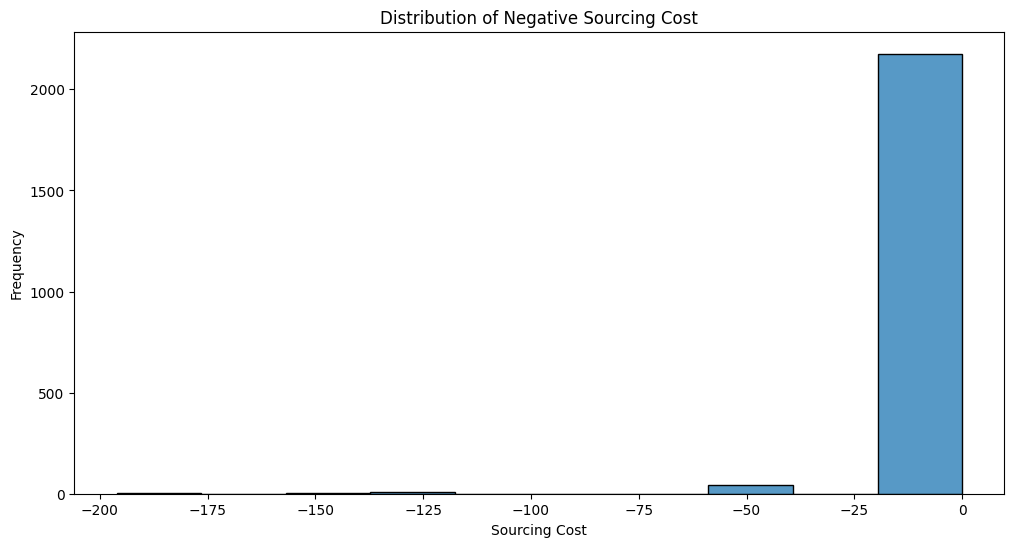

In [37]:
#Histogram
plt.figure(figsize=(12, 6),dpi=100)
sns.histplot(negative_sourcing_cost['Sourcing Cost'], bins=10, kde=False,palette='Set1')
plt.title('Distribution of Negative Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

***Interpretation***-
- From the above plot it can be seen that most negative values are in the range -25 to 0. We can remove the these values as the number is 2231 which forms a very small part of the dataset

- Another approach could be that we can replace them with the absolute values, if we consider that there has been an error in entering of the data

# Outlier Detection and Handling
- We can either go for trimming of outlier (removing them)
- Second approach could be to clip them to the lower and the upper bound

### 1st approach - Trimming of the outliers

In [38]:
# first quartile (Q1)
Q1 = train_data['Sourcing Cost'].quantile(0.25)

# third quartile (Q3)
Q3 = train_data['Sourcing Cost'].quantile(0.75)

# interquartile range (IQR)
IQR = Q3 - Q1

# lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification of outliers
outliers = train_data[(train_data['Sourcing Cost'] < lower_bound) | (train_data['Sourcing Cost'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]
print("Number of outliers using IQR method:", num_outliers)

Number of outliers using IQR method: 2666


In [39]:
# Removing outliers
outlier_removed_data = train_data[(train_data['Sourcing Cost'] >= lower_bound) & (train_data['Sourcing Cost'] <= upper_bound)]

# Checking the shape of the cleaned dataframe
print("Shape of cleaned dataframe:", outlier_removed_data.shape)

Shape of cleaned dataframe: (547510, 8)


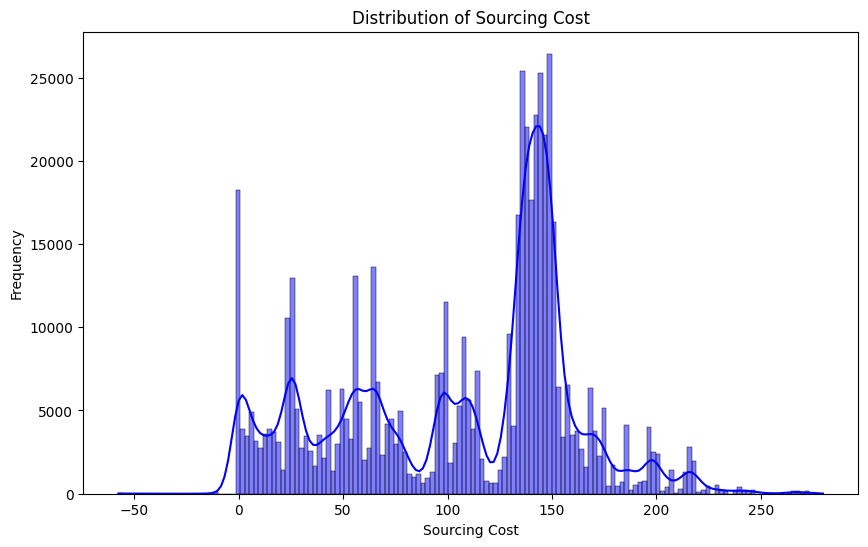

In [40]:
# Distribution plot for 'Sourcing Cost' after removing the outliers.
plt.figure(figsize=(10, 6))
sns.histplot(outlier_removed_data['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

#### Removing the rows with negative_values

In [41]:
train_data_with_outliers_removed = outlier_removed_data.copy()

In [42]:
train_data_with_outlier_removed_neg_rem = train_data_with_outliers_removed[train_data_with_outliers_removed['Sourcing Cost'] > 0]
train_data_with_outlier_removed_neg_rem.shape

(535209, 8)

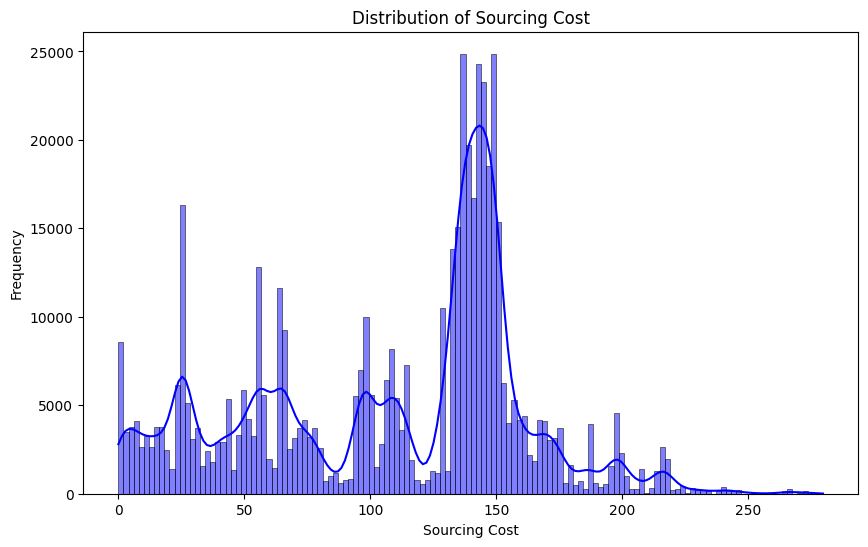

In [43]:
# Distribution plot for 'Sourcing Cost' after removing the negative values.
plt.figure(figsize=(10, 6))
sns.histplot(train_data_with_outlier_removed_neg_rem['Sourcing Cost'], kde=True, color='blue')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

In [44]:
train_data_with_outlier_removed_neg_rem.to_csv("train_data_with_outlier_removed_neg_rem.csv")

#### Making the negative values absolute

In [45]:
train_data_with_outlier_removed_abs = train_data_with_outliers_removed.copy()
train_data_with_outlier_removed_abs['Sourcing Cost'] = train_data_with_outlier_removed_abs['Sourcing Cost'].abs()

In [46]:
train_data_with_outlier_removed_abs.to_csv("train_data_with_outlier_removed_abs.csv")

### 2nd Approach - Clipping the outliers

In [47]:
train_data_with_outlier_clipping = train_data.copy()
train_data_with_outlier_clipping['Sourcing Cost'] = np.where(
    train_data_with_outlier_clipping['Sourcing Cost'] > upper_bound ,
    upper_bound,
    np.where(
        train_data_with_outlier_clipping['Sourcing Cost'] < lower_bound,
        lower_bound,
        train_data_with_outlier_clipping['Sourcing Cost']
    )
)

In [48]:
#The first quartile (Q1)
Q1 = train_data_with_outlier_clipping['Sourcing Cost'].quantile(0.25)
#The third quartile (Q3)
Q3 = train_data_with_outlier_clipping['Sourcing Cost'].quantile(0.75)
# interquartile range (IQR)
IQR = Q3 - Q1
#lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the outliers
outliers = train_data_with_outlier_clipping[(train_data_with_outlier_clipping['Sourcing Cost'] < lower_bound) | (train_data_with_outlier_clipping['Sourcing Cost'] > upper_bound)]
# Number of outliers
num_outliers = outliers.shape[0]
print("Number of outliers using IQR method:", num_outliers)
## We can see that now there are no outliers

Number of outliers using IQR method: 0


In [49]:
# Number of negative sourcing values
len(train_data_with_outlier_clipping[train_data_with_outlier_clipping['Sourcing Cost'] < 0])

2231

#### Removing the rows with *negative_values*

In [50]:
train_data_with_outlier_clipping_neg_rem = train_data_with_outlier_clipping[train_data_with_outlier_clipping['Sourcing Cost'] > 0]
train_data_with_outlier_clipping_neg_rem.shape

(537861, 8)

In [51]:
train_data_with_outlier_clipping_neg_rem.to_csv("train_data_with_outlier_clipping_neg_rem.csv")

#### Making the negative values absolute

In [52]:
train_data_with_outlier_clipping_abs = train_data_with_outlier_clipping.copy()
train_data_with_outlier_clipping_abs['Sourcing Cost'] = train_data_with_outlier_clipping_abs['Sourcing Cost'].abs()

In [53]:
# Number of negative values after making absolute
len(train_data_with_outlier_clipping_abs[train_data_with_outlier_clipping_abs['Sourcing Cost'] < 0])

0

In [54]:
train_data_with_outlier_clipping_abs.to_csv("train_data_with_outlier_clipping_abs.csv")

In [55]:
train_data_with_outlier_clipping_abs.shape

(550176, 8)

# Analysis of association between different features

### Why Kruskal Wallis -

- Non Parametric in nature unline other tests which assume the normality of data
- Kruskal Wallis is suitable if there are more than two categories in the categorical columns
- Handles the outliers well

In [56]:
# Kruskal-Wallis Test for Categorical Variables vs. Sourcing Cost - Performed to check the association between the categorical and numeric variable
# List of categorical columns
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
                       'Product Size', 'Product Type', 'Month of Sourcing']

numerical_variable = 'Sourcing Cost'

# dictionary to store Kruskal-Wallis results
kruskal_results = {}

for col in categorical_columns:
    groups = [group[numerical_variable].dropna() for name, group in train_data_with_outlier_removed_neg_rem.groupby(col)]
    if len(groups) > 1:
        statistic, p_val = kruskal(*groups)
        kruskal_results[col] = (statistic, p_val)

# Results
for col, (statistic, p_val) in kruskal_results.items():
    print(f"Kruskal-Wallis result for {col}: H-statistic = {statistic}, p-value = {p_val}")

Kruskal-Wallis result for ProductType: H-statistic = 69341.55687708248, p-value = 0.0
Kruskal-Wallis result for Manufacturer: H-statistic = 76054.46003473306, p-value = 0.0
Kruskal-Wallis result for Area Code: H-statistic = 369885.04617334163, p-value = 0.0
Kruskal-Wallis result for Sourcing Channel: H-statistic = 35953.55509659483, p-value = 0.0
Kruskal-Wallis result for Product Size: H-statistic = 2955.3955060104404, p-value = 0.0
Kruskal-Wallis result for Product Type: H-statistic = 3507.222264483043, p-value = 0.0
Kruskal-Wallis result for Month of Sourcing: H-statistic = 22249.951532613883, p-value = 0.0


 ***Interpretation*** -  These results show that there is association between the categorical and the numeric (Sourcing Cost) features as the p-value is much lower than 0.05 indicating that the differences in Sourcing Cost across different categories of each variable are unlikely to be random and are more likely to be influenced by the category itself.



### Why Cramer's V

- Non Parametric - It does not make assumptions about the distribution of the data like normality.
- Useful in assessing the strength of association between the nominal categorical variables.

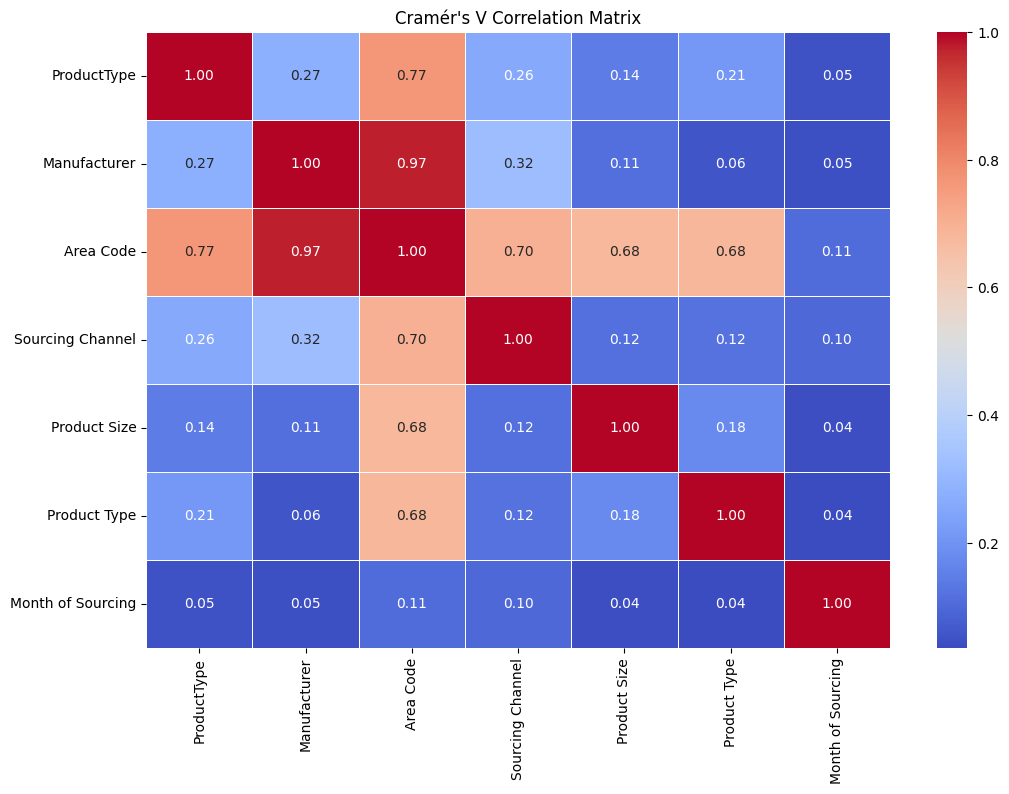

In [57]:
# Cramers_V for finding out correlation between different categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(train_data[col1], train_data[col2])


plt.figure(figsize=(12, 8),dpi=100)
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cramér's V Correlation Matrix")
plt.show()


 ***Interpretation*** -  The heatmap reveals that 'Area Code' is strongly associated with 'ProductType', 'Manufacturer', and 'Sourcing Channel', as shown by high Cramer's V values. This significant overlap suggests redundancy among these categorical variables, potentially leading to issues akin to multicollinearity in predictive modeling. To enhance model effectiveness, it may be wise to either remove or consolidate these variables to reduce redundancy.

# Model Training

# 1st Approach

In [58]:
# Function for training the models

def train_model(model, X, y):
    '''
    This is utility function that takes the instance of the model and fits the model on the data and gives the required scores

    model : Instance of the model
    X : The independent feature set
    y : The dependent variable

    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # number of folds for cross-validation
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')

    # Converting negative RMSE scores to positive and take the mean
    mean_rmse = np.mean(-rmse_scores)

    print("Mean RMSE for {}-fold cross-validation: {:.2f}".format(num_folds, mean_rmse))

    # Fitting the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    return model


In [59]:
# Function for plotting the Sourcing cost of the test data and the predicted values by the model
def plot_data(x, y, x_label, y_label):
    '''
    Utility function for plotting the Original Sourcing cost value and the sourcing cost values predicted by the model

    Parameters :
    x : Quantity on the x-axis
    y : Quantity on the y-axis
    x_label : Label for the x-axis
    y_label : Label for the y-axis
    '''
    plt.figure(figsize=(10, 6))
    plt.plot(x, label=x_label, marker='o')
    plt.plot(y, label=y_label, marker='x')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{x_label} vs {y_label}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [60]:
def encode_categorical_features(data, categorical_columns, encoder=None):
    """
    Encode categorical features using one-hot encoding.

    Parameters:
    - data: DataFrame, the dataset containing categorical features and 'Sourcing Cost' column.
    - categorical_columns: list, names of the categorical columns.
    - encoder: OneHotEncoder, the encoder object (optional, default=None).

    Returns:
    - encoded_data: DataFrame, the dataset with categorical features encoded.
    - encoder: OneHotEncoder, the fitted encoder object.
    """
    if encoder is None:
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(data[categorical_columns])

    encoded_array = encoder.transform(data[categorical_columns])
    encoded_data = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

    return encoded_data, encoder

In [61]:
# Not taking the Area Code and Month of Sourcing columns
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
encoded_data1, encoder = encode_categorical_features(train_data_with_outlier_removed_neg_rem, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Training on data with outliers removed and negative `Sourcing Cost` values removed.

In [62]:
# Splitting the data into features (X) and target variable (y)
X = encoded_data1
y = train_data_with_outlier_removed_neg_rem['Sourcing Cost']

# Splitting the data into training and validation sets (80% training, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [63]:
# Applying the linear regression model
linear_regressor = LinearRegression()
linear_regressor = train_model(linear_regressor, X, y)

Mean RMSE for 5-fold cross-validation: 42.78
Mean Squared Error (MSE): 1831.6071060840436
Root Mean Squared Error (RMSE): 42.79727919020137
Mean Absolute Error (MAE): 31.365054624586605
R^2 Score: 0.3743362430917275


In [64]:
# Applying the random forest model. This rf_regressor1 name is specifically used as there are more models trained ahead so as to
# be able to differentiate properly
rf_regressor1 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor1 = train_model(rf_regressor1,X,y)

Mean RMSE for 5-fold cross-validation: 35.94
Mean Squared Error (MSE): 1286.7941707358862
Root Mean Squared Error (RMSE): 35.87191339663785
Mean Absolute Error (MAE): 24.391647960623132
R^2 Score: 0.5604404063753741


In [65]:
# transforming the test data according to the data the model was trained upon and storing the new data into test_data_encoded
test_data_encoded, encoder = encode_categorical_features(test_data, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
# For linear regression
y_pred_lr = linear_regressor.predict(test_data_encoded)
test_data['linear_regression'] = y_pred_lr

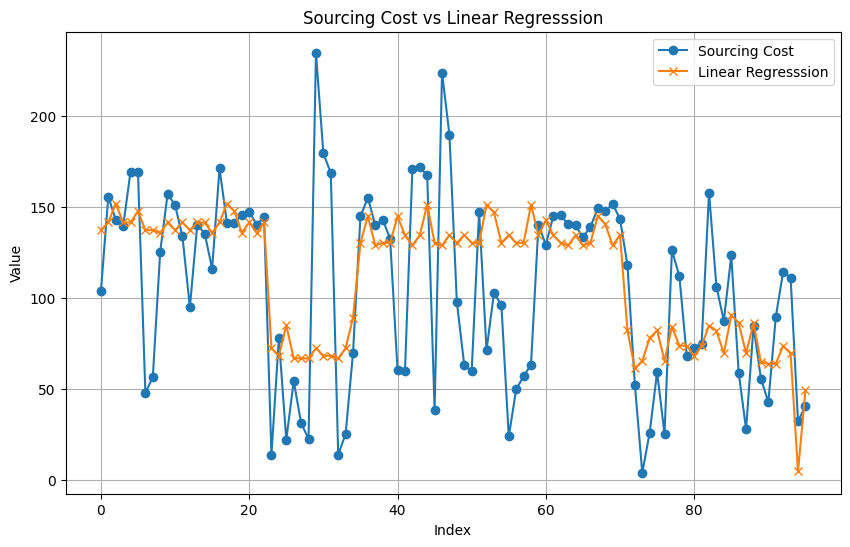

In [67]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['linear_regression']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Linear Regresssion')

From the above plot of orignial data and the predicted data from the linear regression model it can be seen that the linear regression model could not capture the relationship of the original data and its underfitting completely

In [68]:
# Calculating the RMSE and r2_score on test data
print(f"Rmse on test data for Linear Regressor is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_lr ))}")
print(f"R2 score on test data for Linear Regressor  is : {r2_score(test_data['Sourcing Cost'], y_pred_lr )}")

Rmse on test data for Linear Regressor is : 46.31211157031822
R2 score on test data for Linear Regressor  is : 0.20941953164850102


#### Random Forest

In [69]:
y_pred_rg1 = rf_regressor1.predict(test_data_encoded)
# Storing for finding out the difference between the original values of sourcing cost in test data and the predicted values
test_data['rf_regressor1'] = y_pred_rg1

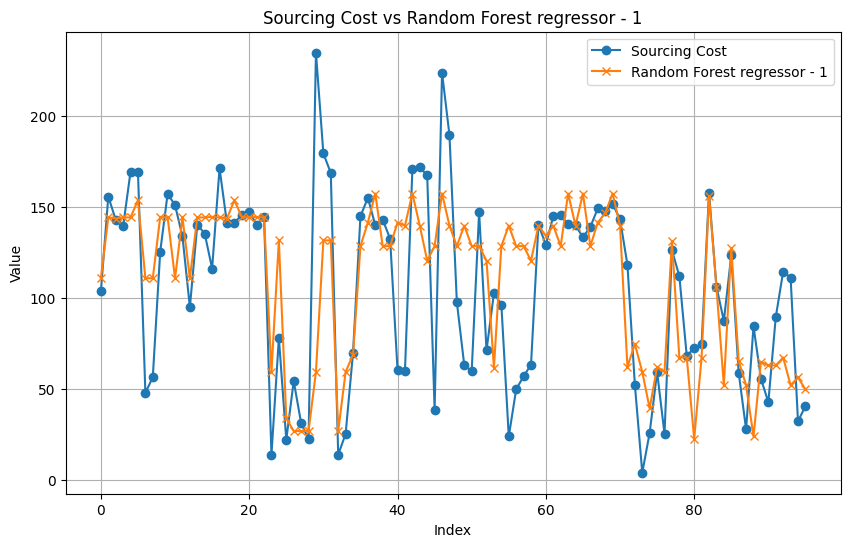

In [70]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['rf_regressor1']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Random Forest regressor - 1')

#### Xg-Boost

In [71]:
# Applying the Xg-Boost Regressor
xgb_regressor1 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor1  = train_model(xgb_regressor1,X,y)

Mean RMSE for 5-fold cross-validation: 35.94
Mean Squared Error (MSE): 1286.7917603606481
Root Mean Squared Error (RMSE): 35.87187979965154
Mean Absolute Error (MAE): 24.390654407794656
R^2 Score: 0.560441229742144


In [72]:
y_pred_xg1 = xgb_regressor1.predict(test_data_encoded)
test_data['xg_regressor1'] = y_pred_xg1

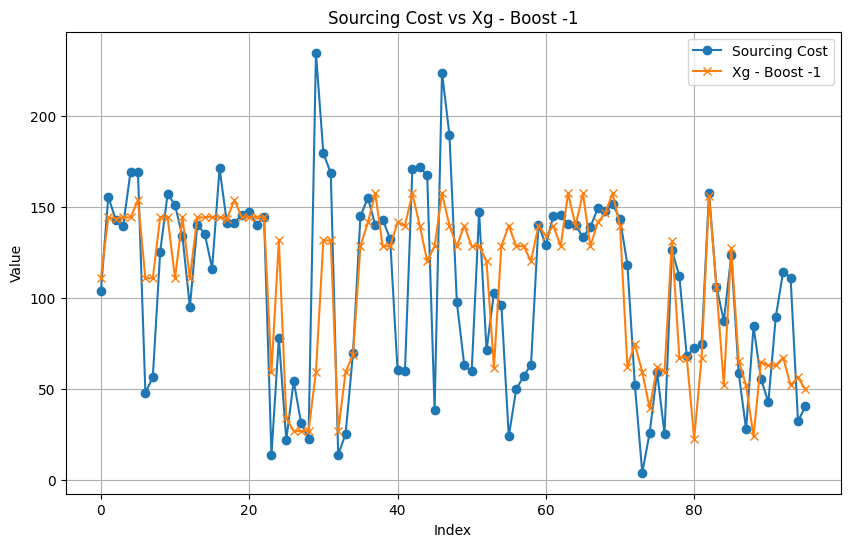

In [73]:
sourcing_cost = test_data['Sourcing Cost']
predicted_xg1 = test_data['xg_regressor1']

plot_data(sourcing_cost,predicted_xg1,'Sourcing Cost','Xg - Boost -1')

In [74]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg1 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg1 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xg1 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xg1 )}")

Rmse on test data for random forest regressor 1 is : 40.6068344703704
R2 score on test data for random forest regressor 2 is : 0.39220771185134407
Rmse on test data for Xg boost regressor 1 is : 40.60173124644163
R2 score on test data for Xg boost regressor 1 is : 0.39236046964630633


### Training on data with outliers removed and negative Sourcing Cost values transformed to absolute values.

In [75]:
# Preparing the data for inputting into the model - encoding all the categorical features exluding Area Code and Month of Sourcing
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
encoded_data2, encoder = encode_categorical_features(train_data_with_outlier_removed_abs, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
X1 = encoded_data2
y1 = train_data_with_outlier_removed_abs['Sourcing Cost']

#### Random Forest

In [77]:
rf_regressor2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor2 = train_model(rf_regressor2,X1,y1)

Mean RMSE for 5-fold cross-validation: 36.63
Mean Squared Error (MSE): 1317.4844019393227
Root Mean Squared Error (RMSE): 36.297167960315065
Mean Absolute Error (MAE): 24.696777409464687
R^2 Score: 0.5738932890313126


In [78]:
y_pred_rg2 = rf_regressor2.predict(test_data_encoded)
test_data['rf_regressor2'] = y_pred_rg2

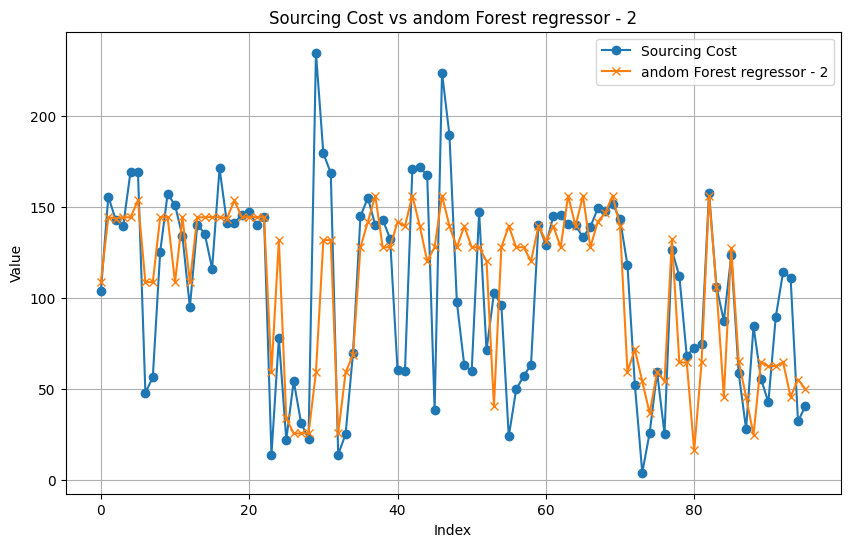

In [79]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf2 = test_data['rf_regressor2']

plot_data(sourcing_cost,predicted_rf2,'Sourcing Cost','andom Forest regressor - 2')

#### Xg Boost

In [80]:
xgb_regressor2 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor2  = train_model(xgb_regressor2,X1,y1)

Mean RMSE for 5-fold cross-validation: 36.63
Mean Squared Error (MSE): 1317.4920918273306
Root Mean Squared Error (RMSE): 36.297273889747295
Mean Absolute Error (MAE): 24.697990526804976
R^2 Score: 0.5738908019332628


In [81]:
y_pred_xgb2 = xgb_regressor2.predict(test_data_encoded)
test_data['xgb_regressor2'] = y_pred_xgb2

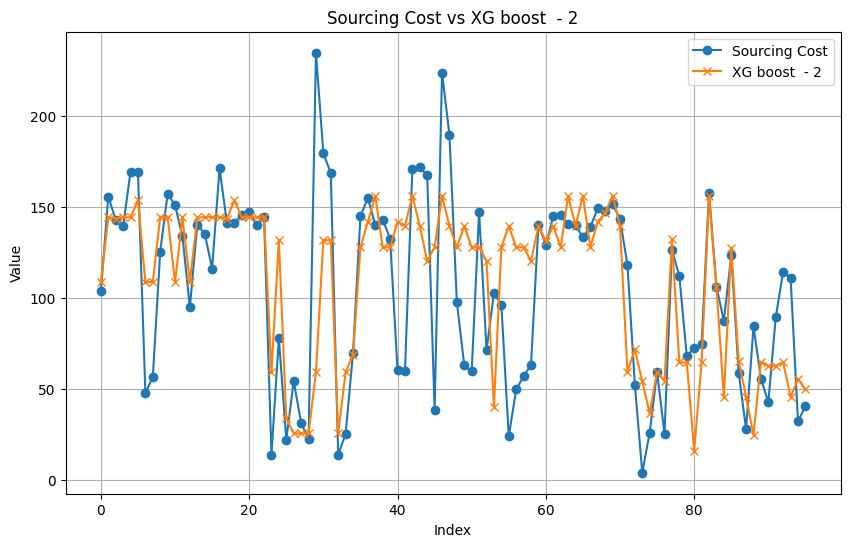

In [82]:
sourcing_cost = test_data['Sourcing Cost']
predicted_xgb2 = test_data['xgb_regressor2']

plot_data(sourcing_cost,predicted_xgb2,'Sourcing Cost','XG boost  - 2')

In [83]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg2 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg2 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xgb2 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xgb2 )}")

Rmse on test data for random forest regressor 1 is : 40.96603810421829
R2 score on test data for random forest regressor 2 is : 0.38140722350220135
Rmse on test data for Xg boost regressor 1 is : 40.97420447697922
R2 score on test data for Xg boost regressor 1 is : 0.38116057222981725


### Training on data with uutliers removed and negative Sourcing Cost values removed

In [84]:
encoded_data3, encoder = encode_categorical_features(train_data_with_outlier_clipping_neg_rem, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [85]:
X2 = encoded_data3
y2 = train_data_with_outlier_clipping_neg_rem['Sourcing Cost']

#### Random Forest

In [86]:
rf_regressor3 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor3 = train_model(rf_regressor3,X2,y2)

Mean RMSE for 5-fold cross-validation: 37.60
Mean Squared Error (MSE): 1416.0154430467232
Root Mean Squared Error (RMSE): 37.629980641062296
Mean Absolute Error (MAE): 25.085173763228354
R^2 Score: 0.5335099015660394


In [87]:
y_pred_rg3 = rf_regressor3.predict(test_data_encoded)
test_data['rf_regressor3'] = y_pred_rg3

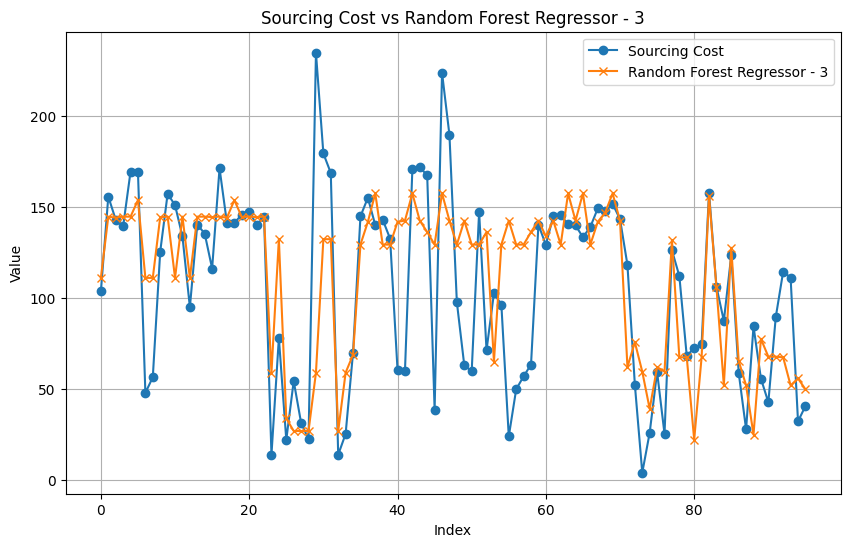

In [88]:
sourcing_cost = test_data['Sourcing Cost']
predicted_rf = test_data['rf_regressor3']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Random Forest Regressor - 3')

#### Xg-Boost

In [89]:
xgb_regressor3 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor3 = train_model(xgb_regressor3,X2,y2)

Mean RMSE for 5-fold cross-validation: 37.60
Mean Squared Error (MSE): 1416.0202587045512
Root Mean Squared Error (RMSE): 37.63004462799043
Mean Absolute Error (MAE): 25.08358519152078
R^2 Score: 0.5335083151026252


In [90]:
y_pred_xg3 = xgb_regressor3.predict(test_data_encoded)
test_data['xgb_regressor3'] = y_pred_xg3

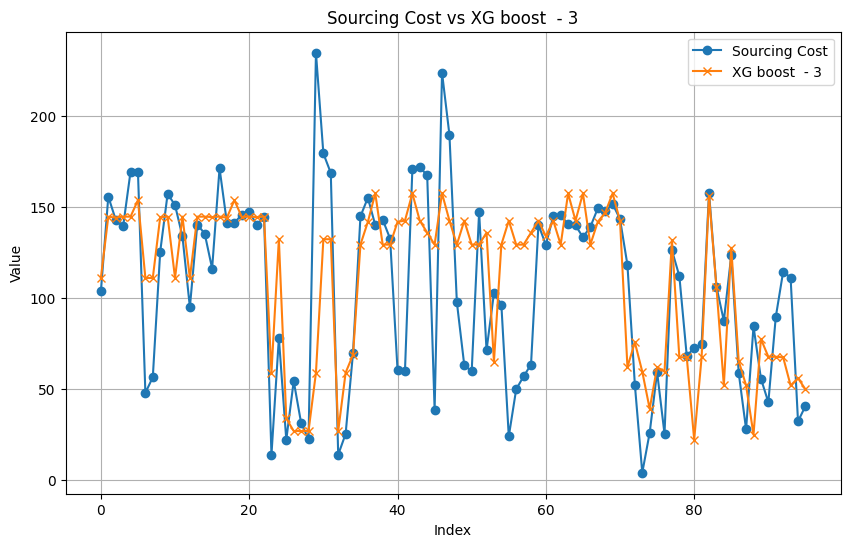

In [91]:
sourcing_cost = test_data['Sourcing Cost']
predicted_xg3 = test_data['xgb_regressor3']

plot_data(sourcing_cost,predicted_xg3,'Sourcing Cost','XG boost  - 3')

In [92]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg3 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg3 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xg3 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xg3 )}")

Rmse on test data for random forest regressor 1 is : 41.15927714193754
R2 score on test data for random forest regressor 2 is : 0.37555758765860425
Rmse on test data for Xg boost regressor 1 is : 41.14896061172968
R2 score on test data for Xg boost regressor 1 is : 0.3758705801165405


### Training on data with outliers clipped and negative Sourcing Cost Values transformed to absolute values

In [93]:
encoded_data4, encoder = encode_categorical_features(train_data_with_outlier_clipping_abs, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
X4 = encoded_data4
y4 = train_data_with_outlier_clipping_abs['Sourcing Cost']

#### Random Forest

In [95]:
rf_regressor4 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor4 = train_model(rf_regressor4,X4,y4)

Mean RMSE for 5-fold cross-validation: 38.23
Mean Squared Error (MSE): 1456.7780426939387
Root Mean Squared Error (RMSE): 38.16776182452855
Mean Absolute Error (MAE): 25.524424439884616
R^2 Score: 0.5503273087035607


In [96]:
y_pred_rg4 = rf_regressor4.predict(test_data_encoded)
test_data['rf_regressor4'] = y_pred_rg4

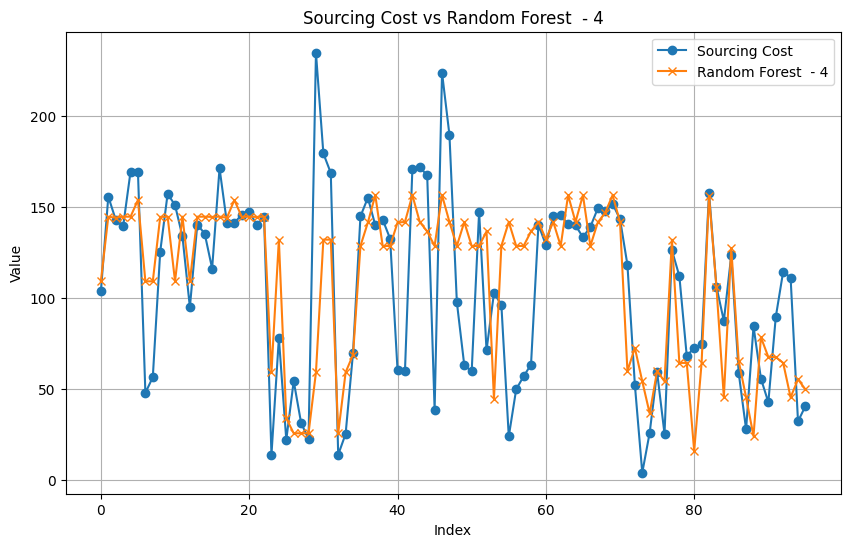

In [97]:
# Extract Sourcing Cost and predicted values from the test data
sourcing_cost = test_data['Sourcing Cost']
predicted_rf4 = test_data['rf_regressor4']

plot_data(sourcing_cost,predicted_rf4,'Sourcing Cost','Random Forest  - 4')

#### Xg-Boost

In [98]:
xgb_regressor4 = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_regressor4 = train_model(xgb_regressor4,X4,y4)

Mean RMSE for 5-fold cross-validation: 38.23
Mean Squared Error (MSE): 1456.7675842904935
Root Mean Squared Error (RMSE): 38.167624818561784
Mean Absolute Error (MAE): 25.523010531498176
R^2 Score: 0.5503305369636566


In [99]:
y_pred_xg4 = xgb_regressor4.predict(test_data_encoded)
test_data['xgb_regressor4'] = y_pred_xg4

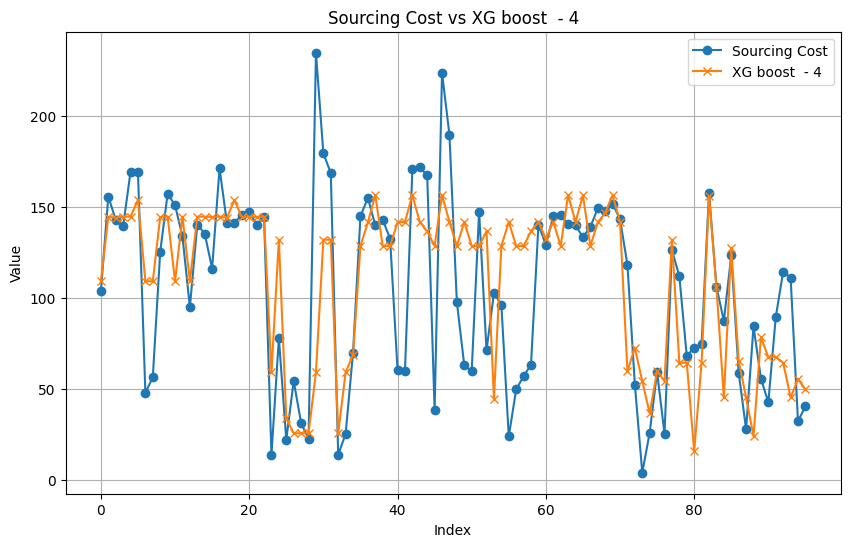

In [100]:
sourcing_cost = test_data['Sourcing Cost']
predicted_xg = test_data['xgb_regressor4']

plot_data(sourcing_cost,predicted_xg,'Sourcing Cost','XG boost  - 4')

In [101]:
print(f"Rmse on test data for random forest regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_rg4 ))}")
print(f"R2 score on test data for random forest regressor 2 is : {r2_score(test_data['Sourcing Cost'], y_pred_rg4 )}")
print(f"Rmse on test data for Xg boost regressor 1 is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_xg4 ))}")
print(f"R2 score on test data for Xg boost regressor 1 is : {r2_score(test_data['Sourcing Cost'], y_pred_xg4 )}")

Rmse on test data for random forest regressor 1 is : 41.48537497219912
R2 score on test data for random forest regressor 2 is : 0.3656236923183871
Rmse on test data for Xg boost regressor 1 is : 41.486592803775
R2 score on test data for Xg boost regressor 1 is : 0.36558644667032114


#### Hyperparameter tuning -

In [ ]:
def tuning(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_

    print("Best hyperparameters:", grid_search.best_params_)


    best_model.fit(X, y)

    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    return best_model

tuning(rf_regressor1,X1,y1)

# The tuning was done in a seperate notebook as it took around 4.68 hours to run so I needed to to run in a seperate notebook that's
# why the output is not visible just below the cell.

# Results -

# Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
# Mean Squared Error (MSE): 1286.6241407639009
# Root Mean Squared Error (RMSE): 35.86954335873125
# Mean Absolute Error (MAE): 24.380465709027916
# R^2 Score: 0.5604984873856005

# 2nd Approach

In [114]:
# Grouping similar rows together and sum the sourcing cost for each product
grouped_data = train_data_with_outlier_removed_neg_rem.groupby(['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']).agg({'Sourcing Cost': 'sum'}).reset_index()
# Counting the quantity of each product
grouped_data['Quantity'] = train_data_with_outlier_removed_neg_rem.groupby(['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']).size().reset_index(name='Quantity')['Quantity']
# Calculating the average sourcing cost
grouped_data['Average Sourcing Cost'] = grouped_data['Sourcing Cost']/grouped_data['Quantity']
grouped_data.head()

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Quantity,Average Sourcing Cost
0,NTM1,X1,DIRECT,Large,Liquid,2020-07-01,114574.721,848,135.111699
1,NTM1,X1,DIRECT,Large,Liquid,2020-08-01,106177.277,774,137.179944
2,NTM1,X1,DIRECT,Large,Liquid,2020-09-01,96918.220,702,138.060142
3,NTM1,X1,DIRECT,Large,Liquid,2020-10-01,139215.548,1018,136.753976
4,NTM1,X1,DIRECT,Large,Liquid,2020-11-01,222266.170,1602,138.742928


In [115]:
# Removing the Month of Sourcing column
grouped_data.drop(['Month of Sourcing'],axis=1, inplace=True)

In [116]:
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
encoded_data_grouped, encoder = encode_categorical_features(grouped_data, categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Random **Forest**

In [168]:
X = encoded_data_grouped
y = grouped_data['Average Sourcing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor_agg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_agg.fit(X_train, y_train)

y_pred = rf_regressor_agg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_agg = r2_score(y_test, y_pred)
r2_agg = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (MSE):", np.sqrt(mse))
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2_agg)

Mean Squared Error (MSE): 97.57919939059676
Root Mean Squared Error (MSE): 9.87821843201479
Mean Absolute Error (MAE): 6.953256645212294
R^2 Score: 0.9516585288164913


#### Xg Boost

In [170]:
xg_agg = XGBRegressor(n_estimators=100, random_state=42)
xg_agg.fit(X_train,y_train)

predictions_xgboost_agg = xg_agg.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, predictions_xgboost_agg)
r2 = r2_score(y_test, predictions_xgboost_agg)
rmse = mean_squared_error(y_test, predictions_xgboost_agg, squared=False)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root mean squared error {rmse}")

Mean Squared Error: 97.72733721063662
R^2 Score: 0.9515851402233959
Root mean squared error 9.885713793684127


In [178]:
# Making predictions on the preprocessed test data using the trained model of random forest
y_pred_agg_rf = rf_regressor_agg.predict(test_data_encoded)

In [179]:
# Making predictions on the preprocessed test data using the trained model of xg boost
y_pred_agg_xg = xg_agg.predict(test_data_encoded)

In [180]:
# Finding rmse and r2 score on test data for random forest
print(f"Rmse on test data for random forest regressor is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_agg_rf ))}")
print(f"R2 score on test data for random forest regressor is : {r2_score(test_data['Sourcing Cost'], y_pred_agg_rf)}")

Rmse on test data for random forest regressor is : 40.4349897236081
R2 score on test data for random forest regressor is : 0.39734107966952514


In [181]:
# Finding rmse and r2 score on test data for Xg Boost
print(f"Rmse on test data for Xg regressor is : {np.sqrt(mean_squared_error(test_data['Sourcing Cost'], y_pred_agg_xg))}")
print(f"R2 score on test data Xg regressor is : {r2_score(test_data['Sourcing Cost'], y_pred_agg_xg)}")

Rmse on test data for Xg regressor is : 40.34684112025453
R2 score on test data Xg regressor is : 0.3999658181751371


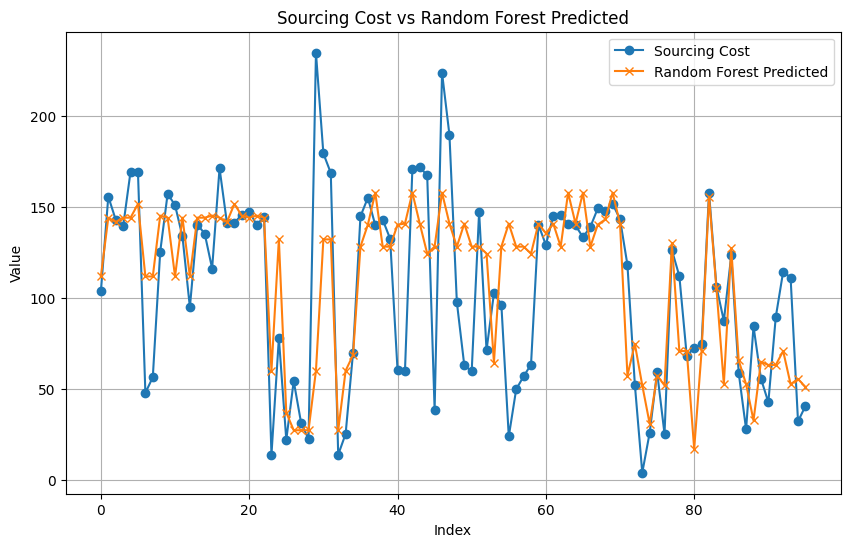

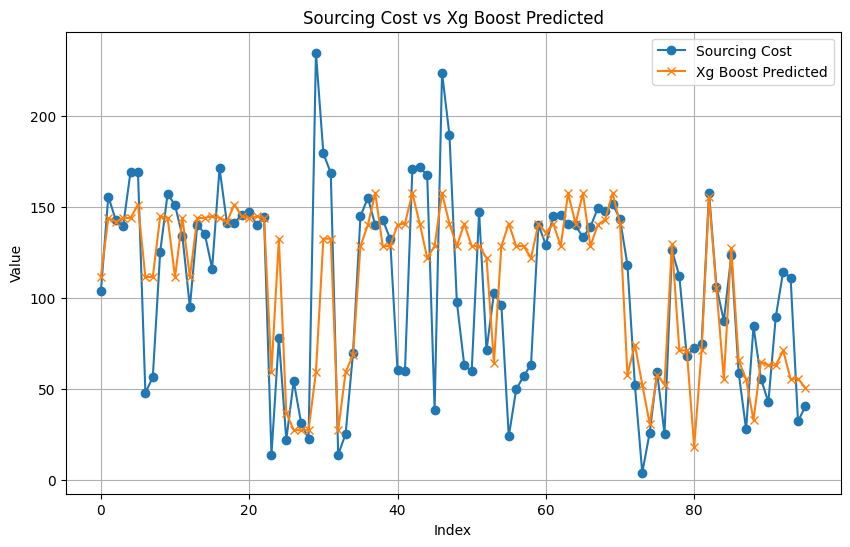

In [177]:
sourcing_cost = test_data['Sourcing Cost']
plot_data(sourcing_cost,y_pred_agg_rf,'Sourcing Cost','Random Forest Predicted')
plot_data(sourcing_cost,y_pred_agg_xg,'Sourcing Cost','Xg Boost Predicted')

# 3rd Approach

In [125]:
df = pd.read_csv('/content/drive/MyDrive/AP_Assignment_data/train_data_with_outlier_removed_neg_rem.csv')
df.head()

# Converting 'Month of Sourcing' to datetime as in csv the datatype was changed to object
df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'])

# setting the  'Month of Sourcing' as the DataFrame index
df.set_index('Month of Sourcing', inplace=True)

# Sorting the DataFrame by the index
df.sort_index(inplace=True)

In [126]:
# Displaying the first few rows of the dataset
df.head()

,Unnamed: 0,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,,
2020-07-01,274337,NTM2,X1,A29,DIRECT,Large,Powder,5.652000e+01
2020-07-01,420682,NTM1,X1,A1,DIRECT,Small,Powder,1.148990e+02
2020-07-01,329313,NTM1,X1,A8,DIRECT,Large,Powder,1.369240e+02
2020-07-01,265720,NTM2,X2,A31,DIRECT,Large,Powder,1.387779e-17
2020-07-01,265722,NTM3,X1,A35,DIRECT,ExtraLarge,Powder,5.700000e+01


In [127]:
# Adding the lagged features for the 'Sourcing Cost' column to capture the historical values of sourcing costs.
# These lagged features will allow the model to consider the effect
# of past sourcing costs on the current value, which can improve prediction accuracy in time series analysis.
for i in range(1, 4):  # Lags from 1 to 3 months
    df[f'lag_{i}'] = df['Sourcing Cost'].shift(i)

In [128]:
# Rolling mean and standard deviation for the past 3 months to help capture the short-term trends,
# variability, and distributional characteristics in sourcing costs

df['rolling_mean_3'] = df['Sourcing Cost'].rolling(window=3).mean()
df['rolling_std_3'] = df['Sourcing Cost'].rolling(window=3).std()

# Additional rolling quantiles
df['rolling_quantile_25'] = df['Sourcing Cost'].rolling(window=3).quantile(0.25)
df['rolling_quantile_75'] = df['Sourcing Cost'].rolling(window=3).quantile(0.75)

In [129]:
# Extracting month, year, and quarter from the index for giving the model features for finding out seasonality or cyclicity
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter

In [130]:
# Checking for the null values
df.isnull().sum()

Unnamed: 0             0
ProductType            0
Manufacturer           0
Area Code              0
Sourcing Channel       0
Product Size           0
Product Type           0
Sourcing Cost          0
lag_1                  1
lag_2                  2
lag_3                  3
rolling_mean_3         2
rolling_std_3          2
rolling_quantile_25    2
rolling_quantile_75    2
month                  0
year                   0
quarter                0
dtype: int64

In [131]:
# Dropping the missing values
df.dropna(inplace=True)  # Dropping rows where any NaN values exist

In [132]:
# Dropping the irrelevant columns
df.drop(['Unnamed: 0','Area Code'],axis=1,inplace=True)

In [133]:
# Data Preperatin for the model feature matrix X and target variable y
X = df.drop('Sourcing Cost', axis=1)
y = df['Sourcing Cost']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Forming the X_train, X_test, y_train and y_test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [139]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

#predictions on the test set
predictions = rf.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root mean squared error {rmse}")

Mean Squared Error: 3.1780752174349276
R^2 Score: 0.9989149280127544
Root mean squared error 1.7827156860910063


In [167]:
xg = XGBRegressor(n_estimators=100, random_state=42)
xg.fit(X_train,y_train)


predictions_xgboost = xg.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, predictions_xgboost)
r2 = r2_score(y_test, predictions_xgboost)
rmse = mean_squared_error(y_test, predictions_xgboost, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Root mean squared error {rmse}")

Mean Squared Error: 17.584910471804825
R^2 Score: 0.9939960849112381
Root mean squared error 4.193436594465788


In [140]:
# Saving the best model
import pickle
# Random Forest
filename = '/content/drive/MyDrive/AP_Assignment_data/best_random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)
print(f"Model saved to {filename}")

# Xg Boost
filename = '/content/drive/MyDrive/AP_Assignment_data/best_xg_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xg, file)
print(f"Model saved to {filename}")


Model saved to /content/drive/MyDrive/AP_Assignment_data/best_random_forest_model.pkl
Model saved to /content/drive/MyDrive/AP_Assignment_data/best_xg_model.pkl


In [142]:
test_data1 = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Test_data.xlsx")

In [143]:
test_data2 = pd.read_excel("/content/drive/MyDrive/AP_Assignment_data/Test_data.xlsx")

In [144]:
test_data1['Month of Sourcing'] = pd.to_datetime(test_data1['Month of Sourcing'])
test_data1.set_index('Month of Sourcing', inplace=True)
test_data1.drop('Area Code',axis=1,inplace=True)

In [145]:
# Appending the last few rows of the training data to the test data for lag and rolling calculations
# As lag features involve using previous values of a time series as predictors for future values.
# By appending the last few rows of the training data to the test data, its ensured that the test data has access to the most recent historical values needed to create lag features.

combined_data = pd.concat([df.tail(3), test_data1])

for i in range(1, 4):  # Adding lags from 1 to 3 months
    combined_data[f'lag_{i}'] = combined_data['Sourcing Cost'].shift(i)

# Rolling mean and standard deviation
combined_data['rolling_mean_3'] = combined_data['Sourcing Cost'].rolling(window=3).mean()
combined_data['rolling_std_3'] = combined_data['Sourcing Cost'].rolling(window=3).std()

# Rolling quantiles
combined_data['rolling_quantile_25'] = combined_data['Sourcing Cost'].rolling(window=3).quantile(0.25)
combined_data['rolling_quantile_75'] = combined_data['Sourcing Cost'].rolling(window=3).quantile(0.75)

test_data1 = combined_data.iloc[3:]


In [ ]:
# Extracting month, year, and quarter from the index
test_data1['month'] = test_data1.index.month
test_data1['year'] = test_data1.index.year
test_data1['quarter'] = test_data1.index.quarter

In [ ]:
# Filling missing values with backfill
test_data1.fillna(method='ffill', inplace=True)

In [148]:
# Applying pd.get_dummies for encoding
test_data1 = pd.get_dummies(test_data1, drop_first=True)

# This loop is for ensuring that the test data has all columns as in the train data
for column in X_train.columns:
    if column not in test_data1.columns:
        test_data1[column] = 0

test_data1 = test_data1[X_train.columns]


In [160]:
preds_rf = rf.predict(test_data1)
preds_xgboost = xg.predict(test_data1)

In [161]:
test_data2['preds_rf'] = preds_rf
test_data2['preds_xg'] = preds_xgboost

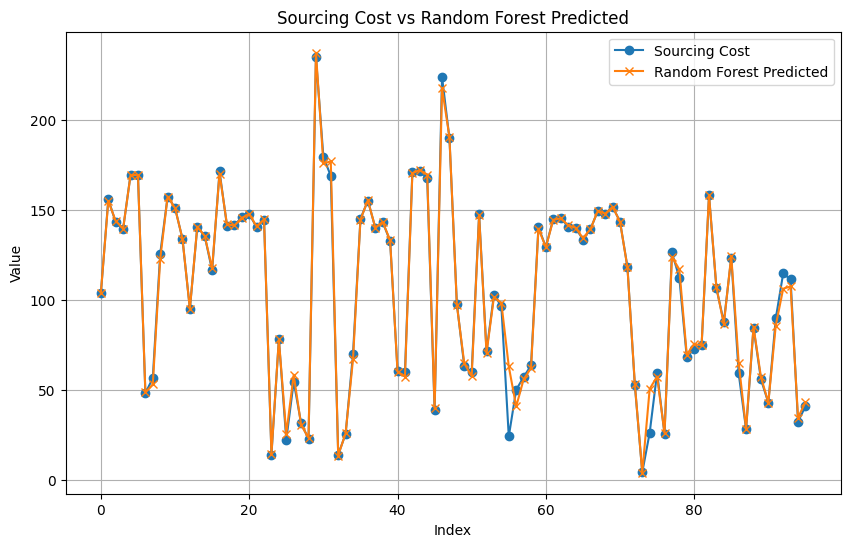

In [158]:
import matplotlib.pyplot as plt

sourcing_cost = test_data2['Sourcing Cost']
predicted_rf = test_data2['preds_rf']

plot_data(sourcing_cost,predicted_rf,'Sourcing Cost','Random Forest Predicted')

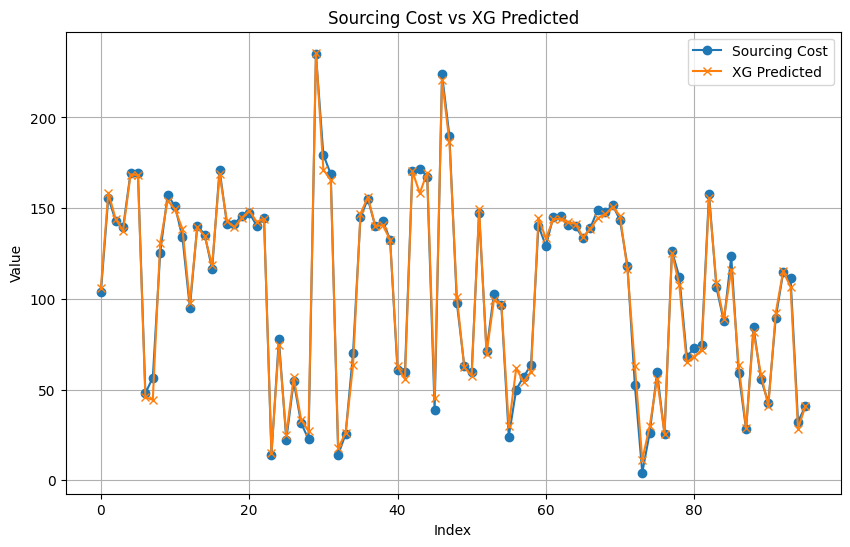

In [162]:
plot_data(sourcing_cost,preds_xgboost,'Sourcing Cost','XG Predicted')

In [164]:
# Calculating the rmse and r2 score on test data for random forest
print(f"Rmse on test data for random Forest regressor 1 is : {np.sqrt(mean_squared_error(test_data2['Sourcing Cost'], preds_rf ))}")
print(f"R2 score on test data for random Forest regressor 2 is : {r2_score(test_data2['Sourcing Cost'], preds_rf )}")

Rmse on test data for random Forest regressor 1 is : 5.2109098898414965
R2 score on test data for random Forest regressor 2 is : 0.9899911532097075


In [165]:
# Calculating the rmse and r2 score on test data for xgboost
print(f"Rmse on test data for random Forest regressor 1 is : {np.sqrt(mean_squared_error(test_data2['Sourcing Cost'], preds_xgboost ))}")
print(f"R2 score on test data for random Forest regressor 2 is : {r2_score(test_data2['Sourcing Cost'], preds_xgboost )}")

Rmse on test data for random Forest regressor 1 is : 3.890962847539325
R2 score on test data for random Forest regressor 2 is : 0.9944195260767736
